# Setup

In [ ]:
!pip install yfinance

In [ ]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

# for graphs
import matplotlib.pyplot as plt


In [ ]:
import requests
import pyarrow.parquet as pq

# Question 1: IPO Filings Web Scraping and Data Processing

In [ ]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
}

url = "https://stockanalysis.com/ipos/filings/"
response = requests.get(url, headers=headers)

ipo_dfs = pd.read_html(response.text)

In [ ]:
ipo_df = ipo_dfs[0]

In [ ]:
ipo_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 325 entries, 0 to 324
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Filing Date     325 non-null    datetime64[ns]
 1   Symbol          325 non-null    object        
 2   Company Name    325 non-null    object        
 3   Price Range     325 non-null    object        
 4   Shares Offered  325 non-null    object        
dtypes: datetime64[ns](1), object(4)
memory usage: 12.8+ KB


In [ ]:
ipo_df['Filing Date'] = pd.to_datetime(ipo_df['Filing Date'])

In [ ]:
ipo_df.head(5)

,Filing Date,Symbol,Company Name,Price Range,Shares Offered
0,2024-04-29,HWEC,"HW Electro Co., Ltd.",$3.00,3750000
1,2024-04-29,DTSQ,DT Cloud Star Acquisition Corporation,$10.00,6000000
2,2024-04-26,EURK,Eureka Acquisition Corp,$10.00,5000000
3,2024-04-26,HDL,Super Hi International Holding Ltd.,-,-
4,2024-04-22,DRJT,Derun Group Inc,$5.00,-


In [ ]:
ipo_df_2023 = ipo_df[(ipo_df["Filing Date"]>="2023-01-01") & (ipo_df["Filing Date"]<="2023-12-31")].reset_index(drop=True)

In [ ]:
ipo_df_2023['Shares Offered'].replace("-", "NaN", inplace=True)

In [ ]:
ipo_df_2023['Shares Offered'] = ipo_df_2023['Shares Offered'].astype("float64")

In [ ]:
# Define a function to calculate an average price
def calculate_avg_price(price_range):
    if price_range == "-":
        return np.nan
    elif '-' in price_range:
        prices = price_range.split(' - ')
        return (float(prices[0][1:]) + float(prices[1][1:])) / 2
    else:
        return float(price_range[1:])

In [ ]:
ipo_df_2023['Avg_price'] = ipo_df_2023['Price Range'].apply(calculate_avg_price)

In [ ]:
ipo_df_2023["Shares_offered_value"] = ipo_df_2023['Avg_price']*ipo_df_2023['Shares Offered']

In [ ]:
ipo_df_2023["DayOfWeek"] = ipo_df_2023["Filing Date"].dt.day_name()

In [ ]:
ipo_df_2023.info()
ipo_df_2023.head(25)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Filing Date           118 non-null    datetime64[ns]
 1   Symbol                118 non-null    object        
 2   Company Name          118 non-null    object        
 3   Price Range           118 non-null    object        
 4   Shares Offered        87 non-null     float64       
 5   Avg_price             91 non-null     float64       
 6   Shares_offered_value  87 non-null     float64       
 7   DayOfWeek             118 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(4)
memory usage: 7.5+ KB


,Filing Date,Symbol,Company Name,Price Range,Shares Offered,Avg_price,Shares_offered_value,DayOfWeek
0,2023-12-29,LEC,Lafayette Energy Corp,$3.50 - $4.50,1200000.0,4.000,4800000.0,Friday
1,2023-12-29,EPSM,Epsium Enterprise Limited,-,NaN,NaN,NaN,Friday
2,2023-12-28,ONDR,"Sushi Ginza Onodera, Inc.",$7.00 - $8.00,1066667.0,7.500,8000002.5,Thursday
3,2023-12-27,JDZG,Jiade Limited,$4.00 - $5.00,2200000.0,4.500,9900000.0,Wednesday
4,2023-12-22,CHLW,Chun Hui Le Wan International Holding Group Ltd,-,NaN,NaN,NaN,Friday
5,2023-12-22,LZMH,LZ Technology Holdings Limited,-,NaN,NaN,NaN,Friday
6,2023-12-21,EEET,3 E Network Technology Group Limited,$4.00 - $6.00,3000000.0,5.000,15000000.0,Thursday
7,2023-12-20,ROLR,"High Roller Technologies, Inc.",$8.00 - $10.00,1500000.0,9.000,13500000.0,Wednesday
8,2023-12-20,AHL,Aspen Insurance Holdings Limited,-,NaN,NaN,NaN,Wednesday
9,2023-12-18,NTHI,"NeOnc Technologies Holdings, Inc.",$11.25 - $13.75,6000000.0,12.500,75000000.0,Monday


In [ ]:
count = ipo_df_2023[ipo_df_2023['DayOfWeek'] == "Friday"]["Shares_offered_value"].count()
count

25

In [ ]:
sum = round(ipo_df_2023[ipo_df_2023['DayOfWeek'] == "Friday"]["Shares_offered_value"].sum()/10**6,0)
sum

286.0

# Question 2: IPOs "Fixed days hold" strategy

In [ ]:
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
}

url = "https://stockanalysis.com/ipos/2023/"
response = requests.get(url, headers=headers)

ipo_dfs = pd.read_html(response.text)

In [ ]:
ipos_2023 = ipo_dfs[0]
ipos_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPO Date      154 non-null    object
 1   Symbol        154 non-null    object
 2   Company Name  154 non-null    object
 3   IPO Price     154 non-null    object
 4   Current       154 non-null    object
 5   Return        154 non-null    object
dtypes: object(6)
memory usage: 7.3+ KB


In [ ]:
url = "https://stockanalysis.com/ipos/2024/"
response = requests.get(url, headers=headers)

ipo_dfs = pd.read_html(response.text)

In [ ]:
ipos_2024 = ipo_dfs[0]
ipos_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPO Date      65 non-null     object
 1   Symbol        65 non-null     object
 2   Company Name  65 non-null     object
 3   IPO Price     65 non-null     object
 4   Current       65 non-null     object
 5   Return        65 non-null     object
dtypes: object(6)
memory usage: 3.2+ KB


In [ ]:
# "stacking dataframes"
# pd.concat() is used to concatenate the DataFrames vertically.
# The ignore_index=True parameter ensures that the resulting DataFrame has a new index,
# ignoring the original indices of the input DataFrames.
# The stacked_df now contains the concatenated DataFrame.
stacked_ipos_df = pd.concat([ipos_2024, ipos_2023], ignore_index=True)

In [ ]:
# convert to datetime
stacked_ipos_df['IPO Date'] = pd.to_datetime(stacked_ipos_df['IPO Date'], format="%b %d, %Y") #"mixed"

In [ ]:
#stacked_ipos_df.info()
ipos = stacked_ipos_df[stacked_ipos_df['IPO Date'] < "2024-03-01"].reset_index(drop=True)

In [ ]:
ipos_cl = ipos[ipos.Symbol != "RYZB"].reset_index(drop=True)

In [ ]:
# Problem --> not always the columns are filled
missing_prices_df = ipos_cl[ipos_cl['IPO Price'].astype(str).str.find('-') >= 0]
missing_prices_df

,IPO Date,Symbol,Company Name,IPO Price,Current,Return


In [ ]:
# it has some missing values --> use defensive errors='coerce' (if don't have time to crack into the data errors)
#     : pd.to_numeric() function call, which will convert problematic values to NaN.
#     otherwise you'll get a ValueError: Unable to parse string "-" at position 9
ipos_cl['IPO Price'] = pd.to_numeric(ipos_cl['IPO Price'].str.replace('$', ''), errors='coerce')
# not sure why, but need to call it again to transform 'object' to 'float64'
ipos_cl['IPO Price'] = pd.to_numeric(ipos_cl['IPO Price'])

In [ ]:
ipos_cl.info()
ipos_cl

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   IPO Date      184 non-null    datetime64[ns]
 1   Symbol        184 non-null    object        
 2   Company Name  184 non-null    object        
 3   IPO Price     184 non-null    float64       
 4   Current       184 non-null    object        
 5   Return        184 non-null    object        
dtypes: datetime64[ns](1), float64(1), object(4)
memory usage: 8.8+ KB


,IPO Date,Symbol,Company Name,IPO Price,Current,Return
0,2024-02-27,SMXT,"SolarMax Technology, Inc.",4.00,$10.93,163.63%
1,2024-02-22,VHAI,Vocodia Holdings Corp,4.25,$0.13,-96.86%
2,2024-02-21,DYCQ,DT Cloud Acquisition Corporation,10.00,$10.16,1.60%
3,2024-02-16,CHRO,Chromocell Therapeutics Corp,6.00,$1.72,-69.38%
4,2024-02-14,UMAC,"Unusual Machines, Inc.",4.00,$1.06,-74.50%
...,...,...,...,...,...,...
179,2023-01-25,QSG,QuantaSing Group Ltd,12.50,$3.18,-74.48%
180,2023-01-20,CVKD,"Cadrenal Therapeutics, Inc.",5.00,$0.50,-90.40%
181,2023-01-13,SKWD,"Skyward Specialty Insurance Group, Inc.",15.00,$37.25,150.73%
182,2023-01-13,ISRL,Israel Acquisitions Corp,10.00,$10.93,9.30%


In [ ]:
# Convert "Current" column
ipos_cl['Current'] = pd.to_numeric(ipos_cl['Current'].str.replace('$', ''), errors='coerce')

# Convert 'Return' to numeric format (percentage)
ipos_cl['Return'] = pd.to_numeric(ipos_cl['Return'].str.replace('%', ''), errors='coerce') / 100

In [ ]:
# generate a new field -- SIMPLE calculation (no function needed)
ipos_cl['Price Increase'] = ipos_cl['Current'] - ipos_cl['IPO Price']

In [ ]:
# simple way of checking NULLs
# (you need to understand how vector operations work .isnull() and calls chaining .isnull().sum())
ipos_cl.isnull().sum()

IPO Date          0
Symbol            0
Company Name      0
IPO Price         0
Current           0
Return            0
Price Increase    0
dtype: int64

In [ ]:
# Descriptive Analytics of a dataset
ipos_cl.describe()

,IPO Date,IPO Price,Current,Return,Price Increase
count,184,184.000000,184.000000,184.000000,184.000000
mean,2023-08-01 01:57:23.478260992,10.449076,9.882880,-0.247947,-0.566196
min,2023-01-13 00:00:00,2.500000,0.000000,-0.999600,-21.120000
25%,2023-04-04 00:00:00,4.000000,1.127500,-0.743075,-3.767500
50%,2023-07-26 12:00:00,8.000000,5.450000,-0.394850,-2.080000
75%,2023-11-11 00:00:00,12.000000,10.797500,0.050250,0.520000
max,2024-02-27 00:00:00,92.000000,118.890000,2.597500,57.120000
std,NaN,9.894117,15.462983,0.642839,8.653670


In [ ]:
# Correctly applied transformations with 'defensive' techniques, but now not all are non-null
ipos_cl.info()
ipos_cl.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 184 entries, 0 to 183
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   IPO Date        184 non-null    datetime64[ns]
 1   Symbol          184 non-null    object        
 2   Company Name    184 non-null    object        
 3   IPO Price       184 non-null    float64       
 4   Current         184 non-null    float64       
 5   Return          184 non-null    float64       
 6   Price Increase  184 non-null    float64       
dtypes: datetime64[ns](1), float64(4), object(2)
memory usage: 10.2+ KB


,IPO Date,Symbol,Company Name,IPO Price,Current,Return,Price Increase
0,2024-02-27,SMXT,"SolarMax Technology, Inc.",4.00,10.93,1.6363,6.93
1,2024-02-22,VHAI,Vocodia Holdings Corp,4.25,0.13,-0.9686,-4.12
2,2024-02-21,DYCQ,DT Cloud Acquisition Corporation,10.00,10.16,0.0160,0.16
3,2024-02-16,CHRO,Chromocell Therapeutics Corp,6.00,1.72,-0.6938,-4.28
4,2024-02-14,UMAC,"Unusual Machines, Inc.",4.00,1.06,-0.7450,-2.94


In [ ]:
# Do you want to leave the record or not?
#ipos_cl[ipos_cl.Return.isnull()]

In [ ]:
# now you can operate with columns as a numeric type
#ipos_cl['IPO Price'].mean()

In [ ]:
#tickers = ipos_cl.Symbol.unique().tolist()
#tickers

In [ ]:
#len(tickers)

In [ ]:
"""
df_yf = pd.DataFrame()

for ticker in tickers:
  df_yf0 = yf.download(tickers = ticker,
                    period = "max",
                    interval = "1d")
  df_yf0 = df_yf0.reset_index()
  df_yf0["Ticker"] = ticker
  df_yf = pd.concat([df_yf0, df_yf], ignore_index=True)
"""

'\ndf_yf = pd.DataFrame()\n\nfor ticker in tickers:\n  df_yf0 = yf.download(tickers = ticker,\n                    period = "max",\n                    interval = "1d")\n  df_yf0 = df_yf0.reset_index()\n  df_yf0["Ticker"] = ticker\n  df_yf = pd.concat([df_yf0, df_yf], ignore_index=True)\n'

In [ ]:
#df_yf.info()
#df_yf.head()

In [ ]:
ipos_cl.loc[ipos_cl['Symbol'] == "PTHR", 'Symbol'] = 'HOVR'

In [ ]:
'PTHR' in ipos_cl.Symbol.unique().tolist()

False

In [ ]:
tickers = ipos_cl.Symbol.unique().tolist()
#tickers

In [ ]:
len(tickers)

184

In [ ]:
df_yf = pd.DataFrame()

for ticker in tickers:
  df_yf0 = yf.download(tickers = ticker,
                    period = "max",
                    interval = "1d")
  df_yf0 = df_yf0.reset_index()
  df_yf0["Ticker"] = ticker
  df_yf = pd.concat([df_yf0, df_yf], ignore_index=True)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [ ]:
df_yf.info()
df_yf.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37932 entries, 0 to 37931
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       37932 non-null  datetime64[ns]
 1   Open       37932 non-null  float64       
 2   High       37932 non-null  float64       
 3   Low        37932 non-null  float64       
 4   Close      37932 non-null  float64       
 5   Adj Close  37932 non-null  float64       
 6   Volume     37932 non-null  int64         
 7   Ticker     37932 non-null  object        
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 2.3+ MB


,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2023-01-13,8.60,16.610001,4.29,4.65,4.65,14431000,MGOL
1,2023-01-17,5.41,6.700000,4.64,4.90,4.90,16055800,MGOL
2,2023-01-18,4.64,4.890000,3.70,3.70,3.70,3666700,MGOL
3,2023-01-19,3.46,4.100000,3.31,3.93,3.93,3009200,MGOL
4,2023-01-20,3.55,3.802000,3.40,3.44,3.44,1346500,MGOL


In [ ]:
df_merge = pd.merge(df_yf, ipos_cl, how="left", left_on="Ticker", right_on="Symbol")

In [ ]:
#df_merge['growth_future_1d'] = df_merge['Adj Close'].shift(-1) / df_merge['Adj Close']

In [ ]:
df_merge_cl = df_merge.loc[:, ["Date", "Adj Close", "Ticker"]]
# "IPO Date"

In [ ]:
df_merge_cl.info()
df_merge_cl.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37932 entries, 0 to 37931
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       37932 non-null  datetime64[ns]
 1   Adj Close  37932 non-null  float64       
 2   Ticker     37932 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 889.2+ KB


,Date,Adj Close,Ticker
0,2023-01-13,4.65,MGOL
1,2023-01-17,4.90,MGOL
2,2023-01-18,3.70,MGOL
3,2023-01-19,3.93,MGOL
4,2023-01-20,3.44,MGOL


In [ ]:
df_merge_cl_sort = df_merge_cl.sort_values(by=["Ticker", "Date"])

In [ ]:
df_merge_cl_sort.info()
df_merge_cl_sort

In [ ]:
def gen_growth_columns(df):
  for i in list(range(1, 31)):
    df["growth_future_" + str(i) + "d"] = df['Adj Close'].shift(-i) / df['Adj Close']
  return df

In [ ]:
df_growth = pd.DataFrame()
for ticker in df_merge_cl_sort.Ticker.unique().tolist():
  df_growth0 = df_merge_cl_sort[df_merge_cl_sort.Ticker == ticker].reset_index(drop=True)
  df_growth0 = gen_growth_columns(df_growth0)
  df_growth = pd.concat([df_growth0, df_growth], ignore_index=True)

In [ ]:
df_growth.info()
df_growth

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37932 entries, 0 to 37931
Data columns (total 33 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Date               37932 non-null  datetime64[ns]
 1   Adj Close          37932 non-null  float64       
 2   Ticker             37932 non-null  object        
 3   growth_future_1d   37748 non-null  float64       
 4   growth_future_2d   37564 non-null  float64       
 5   growth_future_3d   37380 non-null  float64       
 6   growth_future_4d   37196 non-null  float64       
 7   growth_future_5d   37012 non-null  float64       
 8   growth_future_6d   36828 non-null  float64       
 9   growth_future_7d   36644 non-null  float64       
 10  growth_future_8d   36460 non-null  float64       
 11  growth_future_9d   36276 non-null  float64       
 12  growth_future_10d  36092 non-null  float64       
 13  growth_future_11d  35908 non-null  float64       
 14  growth

,Date,Adj Close,Ticker,growth_future_1d,growth_future_2d,growth_future_3d,growth_future_4d,growth_future_5d,growth_future_6d,growth_future_7d,...,growth_future_21d,growth_future_22d,growth_future_23d,growth_future_24d,growth_future_25d,growth_future_26d,growth_future_27d,growth_future_28d,growth_future_29d,growth_future_30d
0,2023-12-15,15.500,ZKH,1.000000,1.000000,1.011613,1.008387,1.003871,1.029032,1.025806,...,1.079355,1.038710,1.045161,1.084516,1.194839,1.228387,1.106452,1.145161,1.169032,1.100645
1,2023-12-18,15.500,ZKH,1.000000,1.011613,1.008387,1.003871,1.029032,1.025806,1.040000,...,1.038710,1.045161,1.084516,1.194839,1.228387,1.106452,1.145161,1.169032,1.100645,1.121935
2,2023-12-19,15.500,ZKH,1.011613,1.008387,1.003871,1.029032,1.025806,1.040000,1.052258,...,1.045161,1.084516,1.194839,1.228387,1.106452,1.145161,1.169032,1.100645,1.121935,1.152258
3,2023-12-20,15.680,ZKH,0.996811,0.992347,1.017219,1.014031,1.028061,1.040179,1.007653,...,1.072066,1.181122,1.214286,1.093750,1.132015,1.155612,1.088010,1.109056,1.139031,1.121811
4,2023-12-21,15.630,ZKH,0.995521,1.020473,1.017274,1.031350,1.043506,1.010877,0.991683,...,1.184901,1.218170,1.097249,1.135637,1.159309,1.091491,1.112604,1.142674,1.125400,1.126679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37927,2024-05-02,10.630,AACT,0.999059,0.999059,0.999059,0.999530,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37928,2024-05-03,10.620,AACT,1.000000,1.000000,1.000471,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37929,2024-05-06,10.620,AACT,1.000000,1.000471,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
37930,2024-05-07,10.620,AACT,1.000471,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Find index of the minimum date for each name
min_date_indices = df_growth.groupby('Ticker')['Date'].idxmin()

# Create new DataFrame with rows corresponding to min dates for each name
df_growth1 = df_growth.loc[min_date_indices].reset_index(drop=True)

In [ ]:
#df_growth1.info()
df_75prcl = df_growth1.iloc[:, list(range(3,33))].quantile(0.75).reset_index()
df_75prcl

,index,0.75
0,growth_future_1d,1.012352
1,growth_future_2d,1.018409
2,growth_future_3d,1.009551
3,growth_future_4d,1.008924
4,growth_future_5d,1.009369
5,growth_future_6d,1.007147
6,growth_future_7d,1.006871
7,growth_future_8d,1.008127
8,growth_future_9d,1.011545
9,growth_future_10d,1.010670


In [ ]:
df_75prcl.loc[[df_75prcl[0.75].idxmax()],]

,index,0.75
27,growth_future_28d,1.039693


# Question 3: Is Growth Concentrated in the Largest Stocks?

In [ ]:
# https://companiesmarketcap.com/usa/largest-companies-in-the-usa-by-market-cap/
US_STOCKS = ['MSFT', 'AAPL', 'GOOG', 'NVDA', 'AMZN', 'META', 'BRK-B', 'LLY', 'AVGO','V', 'JPM']

# You're required to add EU_STOCKS and INDIA_STOCS
# https://companiesmarketcap.com/european-union/largest-companies-in-the-eu-by-market-cap/
EU_STOCKS = ['NVO','MC.PA', 'ASML', 'RMS.PA', 'OR.PA', 'SAP', 'ACN', 'TTE', 'SIE.DE','IDEXY','CDI.PA']

# https://companiesmarketcap.com/india/largest-companies-in-india-by-market-cap/
INDIA_STOCKS = ['RELIANCE.NS','TCS.NS','HDB','BHARTIARTL.NS','IBN','SBIN.NS','LICI.NS','INFY','ITC.NS','HINDUNILVR.NS','LT.NS']

In [ ]:
LARGEST_STOCKS = US_STOCKS  + EU_STOCKS + INDIA_STOCKS
LARGEST_STOCKS

['MSFT',
 'AAPL',
 'GOOG',
 'NVDA',
 'AMZN',
 'META',
 'BRK-B',
 'LLY',
 'AVGO',
 'V',
 'JPM',
 'NVO',
 'MC.PA',
 'ASML',
 'RMS.PA',
 'OR.PA',
 'SAP',
 'ACN',
 'TTE',
 'SIE.DE',
 'IDEXY',
 'CDI.PA',
 'RELIANCE.NS',
 'TCS.NS',
 'HDB',
 'BHARTIARTL.NS',
 'IBN',
 'SBIN.NS',
 'LICI.NS',
 'INFY',
 'ITC.NS',
 'HINDUNILVR.NS',
 'LT.NS']

In [ ]:
NEW_US = ['TSLA','WMT','XOM','UNH','MA','PG','JNJ','MRK','HD','COST','ORCL']

NEW_EU = ['PRX.AS','AIR.PA','SU.PA','ETN','SNY','BUD','DTE.DE','ALV.DE','MDT','AI.PA','EL.PA']

NEW_INDIA = ['BAJFINANCE.NS','MARUTI.NS','HCLTECH.NS','TATAMOTORS.NS','SUNPHARMA.NS','ONGC.NS','ADANIENT.NS','NTPC.NS','KOTAKBANK.NS','TITAN.NS']

LARGE_STOCKS = NEW_EU + NEW_US + NEW_INDIA
LARGE_STOCKS

['PRX.AS',
 'AIR.PA',
 'SU.PA',
 'ETN',
 'SNY',
 'BUD',
 'DTE.DE',
 'ALV.DE',
 'MDT',
 'AI.PA',
 'EL.PA',
 'TSLA',
 'WMT',
 'XOM',
 'UNH',
 'MA',
 'PG',
 'JNJ',
 'MRK',
 'HD',
 'COST',
 'ORCL',
 'BAJFINANCE.NS',
 'MARUTI.NS',
 'HCLTECH.NS',
 'TATAMOTORS.NS',
 'SUNPHARMA.NS',
 'ONGC.NS',
 'ADANIENT.NS',
 'NTPC.NS',
 'KOTAKBANK.NS',
 'TITAN.NS']

In [ ]:
df_LestSt = pd.DataFrame()

for ticker in LARGEST_STOCKS:

  print(ticker)

  historyPrices = yf.download(tickers = ticker,
                     period = "max",
                     interval = "1d")

  historyPrices["ticker_category"] = "LARGEST"
  historyPrices["ticker"] = ticker
  historyPrices['Year']= historyPrices.index.year
  historyPrices['Month'] = historyPrices.index.month
  historyPrices['Weekday'] = historyPrices.index.weekday
  historyPrices['Date'] = historyPrices.index.date
  historyPrices['Datetime'] = pd.to_datetime(historyPrices['Date'])
  historyPrices['growth_7d'] = historyPrices['Adj Close'] / historyPrices['Adj Close'].shift(7)

  historyPrices1 = historyPrices[(historyPrices.Datetime >= "2014-01-01") & (historyPrices.Datetime <= "2023-12-31")].reset_index(drop=True)

  df_LestSt = pd.concat([historyPrices1, df_LestSt], ignore_index=True)

MSFT


[*********************100%%**********************]  1 of 1 completed


AAPL


[*********************100%%**********************]  1 of 1 completed


GOOG


[*********************100%%**********************]  1 of 1 completed


NVDA


[*********************100%%**********************]  1 of 1 completed


AMZN


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


META
BRK-B


[*********************100%%**********************]  1 of 1 completed


LLY


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


AVGO
V


[*********************100%%**********************]  1 of 1 completed


JPM


[*********************100%%**********************]  1 of 1 completed


NVO


[*********************100%%**********************]  1 of 1 completed


MC.PA


[*********************100%%**********************]  1 of 1 completed


ASML


[*********************100%%**********************]  1 of 1 completed


RMS.PA


[*********************100%%**********************]  1 of 1 completed


OR.PA


[*********************100%%**********************]  1 of 1 completed


SAP


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


ACN
TTE


[*********************100%%**********************]  1 of 1 completed


SIE.DE


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


IDEXY
CDI.PA


[*********************100%%**********************]  1 of 1 completed


RELIANCE.NS


[*********************100%%**********************]  1 of 1 completed


TCS.NS


[*********************100%%**********************]  1 of 1 completed


HDB


[*********************100%%**********************]  1 of 1 completed


BHARTIARTL.NS


[*********************100%%**********************]  1 of 1 completed


IBN


[*********************100%%**********************]  1 of 1 completed


SBIN.NS


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


LICI.NS
INFY


[*********************100%%**********************]  1 of 1 completed


ITC.NS


[*********************100%%**********************]  1 of 1 completed


HINDUNILVR.NS


[*********************100%%**********************]  1 of 1 completed


LT.NS


[*********************100%%**********************]  1 of 1 completed


In [ ]:
df_LestSt.info()
df_LestSt.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80762 entries, 0 to 80761
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Open             80762 non-null  float64       
 1   High             80762 non-null  float64       
 2   Low              80762 non-null  float64       
 3   Close            80762 non-null  float64       
 4   Adj Close        80762 non-null  float64       
 5   Volume           80762 non-null  int64         
 6   ticker_category  80762 non-null  object        
 7   ticker           80762 non-null  object        
 8   Year             80762 non-null  int32         
 9   Month            80762 non-null  int32         
 10  Weekday          80762 non-null  int32         
 11  Date             80762 non-null  object        
 12  Datetime         80762 non-null  datetime64[ns]
 13  growth_7d        80755 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int3

,Open,High,Low,Close,Adj Close,Volume,ticker_category,ticker,Year,Month,Weekday,Date,Datetime,growth_7d
0,716.766663,719.933350,710.933350,712.366638,613.208679,694318,LARGEST,LT.NS,2014,1,2,2014-01-01,2014-01-01,1.007021
1,711.500000,719.933350,685.533325,690.700012,594.558044,2322501,LARGEST,LT.NS,2014,1,3,2014-01-02,2014-01-02,0.969177
2,680.000000,688.633362,672.033325,674.700012,580.785095,3701602,LARGEST,LT.NS,2014,1,4,2014-01-03,2014-01-03,0.940567
3,674.733337,683.966675,666.700012,673.666687,579.895508,2579617,LARGEST,LT.NS,2014,1,0,2014-01-06,2014-01-06,0.942015
4,676.666687,685.700012,672.066650,679.666687,585.060364,2833413,LARGEST,LT.NS,2014,1,1,2014-01-07,2014-01-07,0.945777
5,681.333313,683.933350,664.500000,665.566650,572.923035,3084265,LARGEST,LT.NS,2014,1,2,2014-01-08,2014-01-08,0.938299
6,665.900024,669.333313,646.666687,647.933350,557.744141,4402965,LARGEST,LT.NS,2014,1,3,2014-01-09,2014-01-09,0.908106
7,648.500000,656.000000,634.333313,637.366638,548.648376,4818324,LARGEST,LT.NS,2014,1,4,2014-01-10,2014-01-10,0.894717
8,636.733337,658.599976,636.733337,653.700012,562.708191,3526029,LARGEST,LT.NS,2014,1,0,2014-01-13,2014-01-13,0.946431
9,652.033325,664.533325,645.333313,648.000000,557.801636,2725885,LARGEST,LT.NS,2014,1,1,2014-01-14,2014-01-14,0.960427


In [ ]:
df_LestSt[df_LestSt.growth_7d.isnull()]

,Open,High,Low,Close,Adj Close,Volume,ticker_category,ticker,Year,Month,Weekday,Date,Datetime,growth_7d
9911,872.000000,918.950012,860.000000,875.250000,865.802429,48792877,LARGEST,LICI.NS,2022,5,1,2022-05-17,2022-05-17,NaN
9912,885.549988,891.000000,874.099976,876.349976,866.890503,8919761,LARGEST,LICI.NS,2022,5,2,2022-05-18,2022-05-18,NaN
9913,867.000000,867.000000,838.000000,840.849976,831.773743,7372427,LARGEST,LICI.NS,2022,5,3,2022-05-19,2022-05-19,NaN
9914,848.549988,856.799988,825.000000,826.150024,817.232422,7078291,LARGEST,LICI.NS,2022,5,4,2022-05-20,2022-05-20,NaN
9915,826.150024,852.700012,803.650024,816.849976,808.032776,12444648,LARGEST,LICI.NS,2022,5,0,2022-05-23,2022-05-23,NaN
9916,818.000000,834.700012,816.849976,823.099976,814.215332,4287864,LARGEST,LICI.NS,2022,5,1,2022-05-24,2022-05-24,NaN
9917,831.500000,841.450012,814.250000,820.299988,811.445557,4013031,LARGEST,LICI.NS,2022,5,2,2022-05-25,2022-05-25,NaN


In [ ]:
df_LeSt = pd.DataFrame()

for ticker in LARGE_STOCKS:

  print(ticker)

  historyPrices = yf.download(tickers = ticker,
                     period = "max",
                     interval = "1d")

  historyPrices["ticker_category"] = "LARGE"
  historyPrices["ticker"] = ticker
  historyPrices['Year']= historyPrices.index.year
  historyPrices['Month'] = historyPrices.index.month
  historyPrices['Weekday'] = historyPrices.index.weekday
  historyPrices['Date'] = historyPrices.index.date
  historyPrices['Datetime'] = pd.to_datetime(historyPrices['Date'])
  historyPrices['growth_7d'] = historyPrices['Adj Close'] / historyPrices['Adj Close'].shift(7)

  historyPrices1 = historyPrices[(historyPrices.Datetime >= "2014-01-01") & (historyPrices.Datetime <= "2023-12-31")].reset_index(drop=True)

  df_LeSt = pd.concat([historyPrices1, df_LeSt], ignore_index=True)

PRX.AS


[*********************100%%**********************]  1 of 1 completed


AIR.PA


[*********************100%%**********************]  1 of 1 completed


SU.PA


[*********************100%%**********************]  1 of 1 completed


ETN


[*********************100%%**********************]  1 of 1 completed


SNY


[*********************100%%**********************]  1 of 1 completed


BUD


[*********************100%%**********************]  1 of 1 completed


DTE.DE


[*********************100%%**********************]  1 of 1 completed


ALV.DE


[*********************100%%**********************]  1 of 1 completed


MDT


[*********************100%%**********************]  1 of 1 completed


AI.PA


[*********************100%%**********************]  1 of 1 completed


EL.PA


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


TSLA
WMT


[*********************100%%**********************]  1 of 1 completed


XOM


[*********************100%%**********************]  1 of 1 completed


UNH


[*********************100%%**********************]  1 of 1 completed


MA


[*********************100%%**********************]  1 of 1 completed


PG


[*********************100%%**********************]  1 of 1 completed


JNJ


[*********************100%%**********************]  1 of 1 completed


MRK


[*********************100%%**********************]  1 of 1 completed


HD


[*********************100%%**********************]  1 of 1 completed


COST


[*********************100%%**********************]  1 of 1 completed


ORCL


[*********************100%%**********************]  1 of 1 completed


BAJFINANCE.NS


[*********************100%%**********************]  1 of 1 completed


MARUTI.NS


[*********************100%%**********************]  1 of 1 completed


HCLTECH.NS


[*********************100%%**********************]  1 of 1 completed


TATAMOTORS.NS


[*********************100%%**********************]  1 of 1 completed


SUNPHARMA.NS


[*********************100%%**********************]  1 of 1 completed


ONGC.NS


[*********************100%%**********************]  1 of 1 completed


ADANIENT.NS


[*********************100%%**********************]  1 of 1 completed


NTPC.NS


[*********************100%%**********************]  1 of 1 completed


KOTAKBANK.NS


[*********************100%%**********************]  1 of 1 completed


TITAN.NS


[*********************100%%**********************]  1 of 1 completed


In [ ]:
df_LeSt.info()
df_LeSt.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78819 entries, 0 to 78818
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Open             78819 non-null  float64       
 1   High             78819 non-null  float64       
 2   Low              78819 non-null  float64       
 3   Close            78819 non-null  float64       
 4   Adj Close        78819 non-null  float64       
 5   Volume           78819 non-null  int64         
 6   ticker_category  78819 non-null  object        
 7   ticker           78819 non-null  object        
 8   Year             78819 non-null  int32         
 9   Month            78819 non-null  int32         
 10  Weekday          78819 non-null  int32         
 11  Date             78819 non-null  object        
 12  Datetime         78819 non-null  datetime64[ns]
 13  growth_7d        78812 non-null  float64       
dtypes: datetime64[ns](1), float64(6), int3

,Open,High,Low,Close,Adj Close,Volume,ticker_category,ticker,Year,Month,Weekday,Date,Datetime,growth_7d
0,230.000000,232.500000,229.350006,230.800003,220.363159,538938,LARGE,TITAN.NS,2014,1,2,2014-01-01,2014-01-01,1.009403
1,229.500000,235.949997,225.100006,226.350006,216.114380,1570396,LARGE,TITAN.NS,2014,1,3,2014-01-02,2014-01-02,0.987996
2,226.000000,228.750000,224.000000,227.399994,217.116913,818984,LARGE,TITAN.NS,2014,1,4,2014-01-03,2014-01-03,0.996494
3,228.000000,230.300003,225.550003,227.800003,217.498825,497192,LARGE,TITAN.NS,2014,1,0,2014-01-06,2014-01-06,0.990650
4,230.000000,230.899994,224.800003,226.050003,215.827927,713955,LARGE,TITAN.NS,2014,1,1,2014-01-07,2014-01-07,0.985182
5,226.899994,226.949997,222.100006,222.750000,212.677155,878308,LARGE,TITAN.NS,2014,1,2,2014-01-08,2014-01-08,0.972920
6,225.149994,227.449997,221.399994,223.850006,213.727463,1126716,LARGE,TITAN.NS,2014,1,3,2014-01-09,2014-01-09,0.975381
7,224.000000,227.250000,219.000000,220.250000,210.290237,983757,LARGE,TITAN.NS,2014,1,4,2014-01-10,2014-01-10,0.954289
8,221.000000,223.399994,214.100006,221.100006,211.101791,1253786,LARGE,TITAN.NS,2014,1,0,2014-01-13,2014-01-13,0.976806
9,221.250000,222.399994,220.000000,221.000000,211.006332,364394,LARGE,TITAN.NS,2014,1,1,2014-01-14,2014-01-14,0.971856


In [ ]:
df_LeSt[df_LeSt.growth_7d.isnull()]

,Open,High,Low,Close,Adj Close,Volume,ticker_category,ticker,Year,Month,Weekday,Date,Datetime,growth_7d
77714,34.868782,35.511101,33.207928,34.038357,33.763878,14787563,LARGE,PRX.AS,2019,9,2,2019-09-11,2019-09-11,NaN
77715,34.501743,34.524685,32.978527,33.148285,32.880985,5842906,LARGE,PRX.AS,2019,9,3,2019-09-12,2019-09-12,NaN
77716,33.171223,34.042942,32.804184,33.905304,33.631897,5068221,LARGE,PRX.AS,2019,9,4,2019-09-13,2019-09-13,NaN
77717,33.515324,33.721783,32.340797,32.340797,32.080009,49689045,LARGE,PRX.AS,2019,9,0,2019-09-16,2019-09-16,NaN
77718,32.758305,33.033585,31.574600,31.794825,31.538439,10523710,LARGE,PRX.AS,2019,9,1,2019-09-17,2019-09-17,NaN
77719,31.638832,31.748943,30.868050,31.060745,30.810280,6887058,LARGE,PRX.AS,2019,9,2,2019-09-18,2019-09-18,NaN
77720,31.290144,31.790236,30.657001,31.565424,31.310888,6470299,LARGE,PRX.AS,2019,9,3,2019-09-19,2019-09-19,NaN


In [ ]:
df_stocks = pd.concat([df_LestSt, df_LeSt], ignore_index=True)

In [ ]:
df_stocks.info()
df_stocks.head(50)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159581 entries, 0 to 159580
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   Open             159581 non-null  float64       
 1   High             159581 non-null  float64       
 2   Low              159581 non-null  float64       
 3   Close            159581 non-null  float64       
 4   Adj Close        159581 non-null  float64       
 5   Volume           159581 non-null  int64         
 6   ticker_category  159581 non-null  object        
 7   ticker           159581 non-null  object        
 8   Year             159581 non-null  int32         
 9   Month            159581 non-null  int32         
 10  Weekday          159581 non-null  int32         
 11  Date             159581 non-null  object        
 12  Datetime         159581 non-null  datetime64[ns]
 13  growth_7d        159567 non-null  float64       
dtypes: datetime64[ns](1)

,Open,High,Low,Close,Adj Close,Volume,ticker_category,ticker,Year,Month,Weekday,Date,Datetime,growth_7d
0,716.766663,719.933350,710.933350,712.366638,613.208679,694318,LARGEST,LT.NS,2014,1,2,2014-01-01,2014-01-01,1.007021
1,711.500000,719.933350,685.533325,690.700012,594.558044,2322501,LARGEST,LT.NS,2014,1,3,2014-01-02,2014-01-02,0.969177
2,680.000000,688.633362,672.033325,674.700012,580.785095,3701602,LARGEST,LT.NS,2014,1,4,2014-01-03,2014-01-03,0.940567
3,674.733337,683.966675,666.700012,673.666687,579.895508,2579617,LARGEST,LT.NS,2014,1,0,2014-01-06,2014-01-06,0.942015
4,676.666687,685.700012,672.066650,679.666687,585.060364,2833413,LARGEST,LT.NS,2014,1,1,2014-01-07,2014-01-07,0.945777
5,681.333313,683.933350,664.500000,665.566650,572.923035,3084265,LARGEST,LT.NS,2014,1,2,2014-01-08,2014-01-08,0.938299
6,665.900024,669.333313,646.666687,647.933350,557.744141,4402965,LARGEST,LT.NS,2014,1,3,2014-01-09,2014-01-09,0.908106
7,648.500000,656.000000,634.333313,637.366638,548.648376,4818324,LARGEST,LT.NS,2014,1,4,2014-01-10,2014-01-10,0.894717
8,636.733337,658.599976,636.733337,653.700012,562.708191,3526029,LARGEST,LT.NS,2014,1,0,2014-01-13,2014-01-13,0.946431
9,652.033325,664.533325,645.333313,648.000000,557.801636,2725885,LARGEST,LT.NS,2014,1,1,2014-01-14,2014-01-14,0.960427


In [ ]:
df_growth7d = df_stocks.groupby(by=["Date", "ticker_category"], as_index = False)["growth_7d"].mean()

In [ ]:
df_growth7d.info()
df_growth7d.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5190 entries, 0 to 5189
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             5190 non-null   object 
 1   ticker_category  5190 non-null   object 
 2   growth_7d        5190 non-null   float64
dtypes: float64(1), object(2)
memory usage: 121.8+ KB


,Date,ticker_category,growth_7d
0,2014-01-01,LARGE,1.009288
1,2014-01-01,LARGEST,1.011797
2,2014-01-02,LARGE,1.004176
3,2014-01-02,LARGEST,1.006334
4,2014-01-03,LARGE,1.002944


In [ ]:
df_pivot = df_stocks.pivot_table(values="growth_7d", index="Date", columns="ticker_category")

In [ ]:
df_pivot["Delta"] = df_pivot["LARGE"] - df_pivot["LARGEST"]

In [ ]:
df_pivot["Delta_sup"] = np.where(df_pivot["Delta"]>0, 1, 0)

In [ ]:
df_pivot.info()
df_pivot

<class 'pandas.core.frame.DataFrame'>
Index: 2595 entries, 2014-01-01 to 2023-12-29
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   LARGE      2595 non-null   float64
 1   LARGEST    2595 non-null   float64
 2   Delta      2595 non-null   float64
 3   Delta_sup  2595 non-null   int64  
dtypes: float64(3), int64(1)
memory usage: 165.9+ KB


ticker_category,LARGE,LARGEST,Delta,Delta_sup
Date,,,,
2014-01-01,1.009288,1.011797,-0.002509,0
2014-01-02,1.004176,1.006334,-0.002158,0
2014-01-03,1.002944,0.999152,0.003792,1
2014-01-06,0.997761,0.994203,0.003558,1
2014-01-07,0.994872,0.992509,0.002363,1
...,...,...,...,...
2023-12-22,1.003994,1.013788,-0.009795,0
2023-12-26,1.014441,1.014900,-0.000460,0
2023-12-27,1.004676,1.014155,-0.009480,0


In [ ]:
round(df_pivot["Delta_sup"].sum()*100/len(df_pivot),0)

47.0

# Question 4: Trying Another Technical Indicators strategy

In [ ]:
table = pq.read_table("/content/stocks_df_combined_trunc_2014_2023.parquet.brotli")
df_m16 = table.to_pandas()

In [ ]:
df_m16.info()
df_m16.head()

<class 'pandas.core.frame.DataFrame'>
Index: 80762 entries, 7011 to 5342
Columns: 202 entries, Open to growth_btc_usd_365d
dtypes: datetime64[ns](3), float64(128), int32(64), int64(5), object(2)
memory usage: 105.4+ MB


,Open,High,Low,Close,Adj Close_x,Volume,Ticker,Year,Month,Weekday,...,growth_brent_oil_7d,growth_brent_oil_30d,growth_brent_oil_90d,growth_brent_oil_365d,growth_btc_usd_1d,growth_btc_usd_3d,growth_btc_usd_7d,growth_btc_usd_30d,growth_btc_usd_90d,growth_btc_usd_365d
7011,37.349998,37.400002,37.099998,37.160000,31.233059,30632200.0,MSFT,2014,2014-01-01,3,...,0.964302,0.992998,0.970030,1.158676,NaN,NaN,NaN,NaN,NaN,NaN
7012,37.200001,37.220001,36.599998,36.910000,31.022930,31134800.0,MSFT,2014,2014-01-01,4,...,0.958139,0.984707,0.961500,1.143209,NaN,NaN,NaN,NaN,NaN,NaN
7013,36.849998,36.889999,36.110001,36.130001,30.367352,43603700.0,MSFT,2014,2014-01-01,0,...,0.953798,0.998223,0.968951,1.168236,NaN,NaN,NaN,NaN,NaN,NaN
7014,36.330002,36.490002,36.209999,36.410000,30.602673,35802800.0,MSFT,2014,2014-01-01,1,...,0.958653,0.993430,0.977598,1.097648,NaN,NaN,NaN,NaN,NaN,NaN
7015,36.000000,36.139999,35.580002,35.759998,30.056356,59971700.0,MSFT,2014,2014-01-01,2,...,0.955161,0.973383,0.974977,1.100781,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_m16.columns.tolist()

['Open',
 'High',
 'Low',
 'Close',
 'Adj Close_x',
 'Volume',
 'Ticker',
 'Year',
 'Month',
 'Weekday',
 'Date',
 'growth_1d',
 'growth_3d',
 'growth_7d',
 'growth_30d',
 'growth_90d',
 'growth_365d',
 'growth_future_5d',
 'SMA10',
 'SMA20',
 'growing_moving_average',
 'high_minus_low_relative',
 'volatility',
 'is_positive_growth_5d_future',
 'ticker_type',
 'index_x',
 'adx',
 'adxr',
 'apo',
 'aroon_1',
 'aroon_2',
 'aroonosc',
 'bop',
 'cci',
 'cmo',
 'dx',
 'macd',
 'macdsignal',
 'macdhist',
 'macd_ext',
 'macdsignal_ext',
 'macdhist_ext',
 'macd_fix',
 'macdsignal_fix',
 'macdhist_fix',
 'mfi',
 'minus_di',
 'mom',
 'plus_di',
 'dm',
 'ppo',
 'roc',
 'rocp',
 'rocr',
 'rocr100',
 'rsi',
 'slowk',
 'slowd',
 'fastk',
 'fastd',
 'fastk_rsi',
 'fastd_rsi',
 'trix',
 'ultosc',
 'willr',
 'index_y',
 'ad',
 'adosc',
 'obv',
 'atr',
 'natr',
 'ht_dcperiod',
 'ht_dcphase',
 'ht_phasor_inphase',
 'ht_phasor_quadrature',
 'ht_sine_sine',
 'ht_sine_leadsine',
 'ht_trendmod',
 'avgprice',

In [ ]:
threshold = 200
df_m16["cci_dum"] = np.where((df_m16.cci > threshold) & (df_m16.Weekday == 4), 1, 0)

In [ ]:
df_growth5d = df_m16[df_m16.cci_dum == 1][["Adj Close_x", "growth_future_5d"]].reset_index(drop=True)

In [ ]:
df_growth5d.info()
df_growth5d

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Adj Close_x       460 non-null    float64
 1   growth_future_5d  460 non-null    float64
 2   1000_profit       460 non-null    float64
dtypes: float64(3)
memory usage: 10.9 KB


,Adj Close_x,growth_future_5d,1000_profit
0,34.912762,1.013190,13.190094
1,39.395618,1.017207,17.207263
2,41.630741,1.016503,16.503151
3,40.151123,1.033794,33.793947
4,46.583046,0.995650,-4.350092
...,...,...,...
455,2058.108887,1.011029,11.028926
456,2469.979980,0.989417,-10.583434
457,2580.430908,1.024476,24.475647
458,2901.600098,1.002395,2.395213


In [ ]:
df_growth5d["1000_profit"] = (df_growth5d['growth_future_5d']-1)*1000

In [ ]:
round(df_growth5d["1000_profit"].sum()/1000,0)

1.0

# _support

## 0) Imports and Installs

In [ ]:
!pip install yfinance

In [ ]:
# IMPORTS
import numpy as np
import pandas as pd

#Fin Data Sources
import yfinance as yf
import pandas_datareader as pdr

#Data viz
import plotly.graph_objs as go
import plotly.express as px

import time
from datetime import date

# for graphs
import matplotlib.pyplot as plt


## 1) [Code Snippet 1] IPOs data from Web

* learn dataframes "stacking" (UNION ALL)
* learn about type casting
* generate new columns (simple and with function)


In [ ]:
import pandas as pd
import requests

headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3',
}

url = "https://stockanalysis.com/ipos/2023/"
response = requests.get(url, headers=headers)

ipo_dfs = pd.read_html(response.text)

In [ ]:
ipos_2023 = ipo_dfs[0]
ipos_2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 154 entries, 0 to 153
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPO Date      154 non-null    object
 1   Symbol        154 non-null    object
 2   Company Name  154 non-null    object
 3   IPO Price     154 non-null    object
 4   Current       154 non-null    object
 5   Return        154 non-null    object
dtypes: object(6)
memory usage: 7.3+ KB


In [ ]:
url = "https://stockanalysis.com/ipos/2024/"
response = requests.get(url, headers=headers)

ipo_dfs = pd.read_html(response.text)

In [ ]:
ipos_2024 = ipo_dfs[0]
ipos_2024.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPO Date      70 non-null     object
 1   Symbol        70 non-null     object
 2   Company Name  70 non-null     object
 3   IPO Price     70 non-null     object
 4   Current       70 non-null     object
 5   Return        70 non-null     object
dtypes: object(6)
memory usage: 3.4+ KB


In [ ]:
# "stacking dataframes"
# pd.concat() is used to concatenate the DataFrames vertically.
# The ignore_index=True parameter ensures that the resulting DataFrame has a new index,
# ignoring the original indices of the input DataFrames.
# The stacked_df now contains the concatenated DataFrame.
stacked_ipos_df = pd.concat([ipos_2024, ipos_2023], ignore_index=True)

In [ ]:
stacked_ipos_df.head(1)

,IPO Date,Symbol,Company Name,IPO Price,Current,Return
0,"May 14, 2024",BTOC,Armlogi Holding Corp.,$5.00,-,-


In [ ]:
# Need to convert everything to a proper type (date, str, int, float, etc.)
stacked_ipos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   IPO Date      224 non-null    object
 1   Symbol        224 non-null    object
 2   Company Name  224 non-null    object
 3   IPO Price     224 non-null    object
 4   Current       224 non-null    object
 5   Return        224 non-null    object
dtypes: object(6)
memory usage: 10.6+ KB


In [ ]:
# convert to datetime
stacked_ipos_df['IPO Date'] = pd.to_datetime(stacked_ipos_df['IPO Date'], format="mixed")

In [ ]:
# Problem --> not always the columns are filled
missing_prices_df = stacked_ipos_df[stacked_ipos_df['IPO Price'].astype(str).str.find('-') >= 0]
missing_prices_df

,IPO Date,Symbol,Company Name,IPO Price,Current,Return


In [ ]:
# it has some missing values --> use defensive errors='coerce' (if don't have time to crack into the data errors)
#     : pd.to_numeric() function call, which will convert problematic values to NaN.
#     otherwise you'll get a ValueError: Unable to parse string "-" at position 9
stacked_ipos_df['IPO Price'] = pd.to_numeric(stacked_ipos_df['IPO Price'].str.replace('$', ''), errors='coerce')
# not sure why, but need to call it again to transform 'object' to 'float64'
stacked_ipos_df['IPO Price'] = pd.to_numeric(stacked_ipos_df['IPO Price'])

In [ ]:
# Convert "Current" column
stacked_ipos_df['Current'] = pd.to_numeric(stacked_ipos_df['Current'].str.replace('$', ''), errors='coerce')

# Convert 'Return' to numeric format (percentage)
stacked_ipos_df['Return'] = pd.to_numeric(stacked_ipos_df['Return'].str.replace('%', ''), errors='coerce') / 100

In [ ]:
# Correctly applied transformations with 'defensive' techniques, but now not all are non-null
stacked_ipos_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   IPO Date      224 non-null    datetime64[ns]
 1   Symbol        224 non-null    object        
 2   Company Name  224 non-null    object        
 3   IPO Price     224 non-null    float64       
 4   Current       223 non-null    float64       
 5   Return        223 non-null    float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 10.6+ KB


In [ ]:
# simple way of checking NULLs
# (you need to understand how vector operations work .isnull() and calls chaining .isnull().sum())
stacked_ipos_df.isnull().sum()

IPO Date        0
Symbol          0
Company Name    0
IPO Price       0
Current         1
Return          1
dtype: int64

In [ ]:
# Do you want to leave the record or not?
stacked_ipos_df[stacked_ipos_df.Return.isnull()]

,IPO Date,Symbol,Company Name,IPO Price,Current,Return
0,2024-05-14,BTOC,Armlogi Holding Corp.,5.0,NaN,NaN


In [ ]:
# now you can operate with columns as a numeric type
stacked_ipos_df['IPO Price'].mean()

11.094330357142857

In [ ]:
# generate a new field -- SIMPLE calculation (no function needed)
stacked_ipos_df['Price Increase'] = stacked_ipos_df['Current'] - stacked_ipos_df['IPO Price']

In [ ]:
stacked_ipos_df.head(1)

,IPO Date,Symbol,Company Name,IPO Price,Current,Return,Price Increase
0,2024-05-14,BTOC,Armlogi Holding Corp.,5.0,NaN,NaN,NaN


In [ ]:
# Descriptive Analytics of a dataset
stacked_ipos_df.describe()

,IPO Date,IPO Price,Current,Return,Price Increase
count,224,224.000000,223.000000,223.000000,223.000000
mean,2023-09-14 17:02:08.571428608,11.094330,11.473318,-0.179536,0.351659
min,2023-01-13 00:00:00,2.500000,0.000000,-0.999600,-19.570000
25%,2023-04-20 18:00:00,4.000000,1.240000,-0.728900,-3.650000
50%,2023-09-19 00:00:00,8.000000,5.970000,-0.172500,-1.160000
75%,2024-01-27 06:00:00,15.000000,11.635000,0.061250,0.640000
max,2024-05-14 00:00:00,92.000000,119.440000,4.035000,65.210000
std,NaN,11.146723,17.658696,0.690780,9.520204


In [ ]:
# some visualisation: bar chart using Plotly Express
import plotly.express as px

# Truncate to the first day in the month - for Bar names
stacked_ipos_df['Date_monthly'] = stacked_ipos_df['IPO Date'].dt.to_period('M').dt.to_timestamp()

# Count the number of deals for each month and year
monthly_deals = stacked_ipos_df['Date_monthly'].value_counts().reset_index().sort_values(by='Date_monthly')
monthly_deals.columns = ['Date_monthly', 'Number of Deals']

# Plotting the bar chart using Plotly Express
fig = px.bar(monthly_deals,
             x='Date_monthly',
             y='Number of Deals',
             labels={'Month_Year': 'Month and Year', 'Number of Deals': 'Number of Deals'},
             title='Number of IPO Deals per Month and Year',
             text='Number of Deals'
             )
fig.update_traces(textposition='outside', # Position the text outside the bars
                  textfont=dict(color='black',size=14), # Adjust the font size of the text
                  )
fig.update_layout(title_x=0.5) # Center the title

fig.show()

In [ ]:
# To be used for home assignment: 'You can notice a bump in the price after the IPO? And after that the price goes down
# You're asked to design a simple strategy to buy and hold for X days (at 'Adj.Close' price, no fees)
# Find an optimal X between 1 and 30, that delivers you a MAX mean return on ALL 2023 IPOs?
# Write down the answer X (a number between 1 and 30)

# What is the distribution of other returns 25-50-75% quantiles? Compare mean and median returns for 2023 (median may be more robust),
  # are you losing money in 25% cases (if 25% quantile returns is < 0)
  # Try the same X for all deals in 2024.  How the mean return in 2024 (out of sample data) is different from 2023 data?

# REDDIT - recent IPO
# https://finance.yahoo.com/quote/RDDT/
reddit = yf.download(tickers = "RDDT",
                     period = "max",
                     interval = "1d")

reddit.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-08,55.000000,55.160000,49.700001,51.400002,51.400002,13509300
2024-05-09,51.240002,51.250000,48.250000,50.110001,50.110001,3909100
2024-05-10,50.639999,54.750000,50.380001,53.529999,53.529999,4450800
2024-05-13,56.490002,61.209999,55.590000,58.189999,58.189999,8072600
2024-05-14,62.570000,64.360001,59.500000,62.470001,62.470001,4967484


<Axes: title={'center': "Reddit's (RDDT) price after the IPO"}, xlabel='Date'>

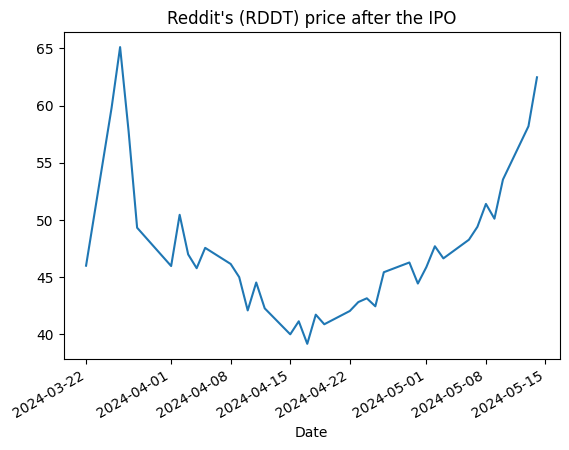

In [ ]:
reddit['Adj Close'].plot.line(title='Reddit\'s (RDDT) price after the IPO')

## 2) OHLCV data transformations

## 2.1 [Code Snippet 2] Time series for OHLCV

In [ ]:
nvo_df = yf.download(tickers = "NVO",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
# big plus of an API's data: good typing from the box!
# notice DatetimeIndex - it is a recognised date
nvo_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10851 entries, 1981-04-30 to 2024-05-14
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       10851 non-null  float64
 1   High       10851 non-null  float64
 2   Low        10851 non-null  float64
 3   Close      10851 non-null  float64
 4   Adj Close  10851 non-null  float64
 5   Volume     10851 non-null  int64  
dtypes: float64(5), int64(1)
memory usage: 593.4 KB


In [ ]:
nvo_df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-08,127.510002,128.429993,126.620003,126.690002,126.690002,4060300
2024-05-09,127.440002,128.800003,126.940002,128.660004,128.660004,2374000
2024-05-10,129.089996,130.270004,128.330002,128.419998,128.419998,3081100
2024-05-13,131.470001,133.500000,130.399994,132.410004,132.410004,6142400
2024-05-14,132.179993,132.869995,131.320007,132.529999,132.529999,1427063


In [ ]:
# filter on date (index)
nvo_df_filtered_from_2020 = nvo_df[nvo_df.index>='2020-01-01']
nvo_df_filtered_from_2024 = nvo_df[nvo_df.index>='2024-01-01']

<Axes: title={'center': 'Novo Nordisk A/S (NVO) price daily'}, xlabel='Date'>

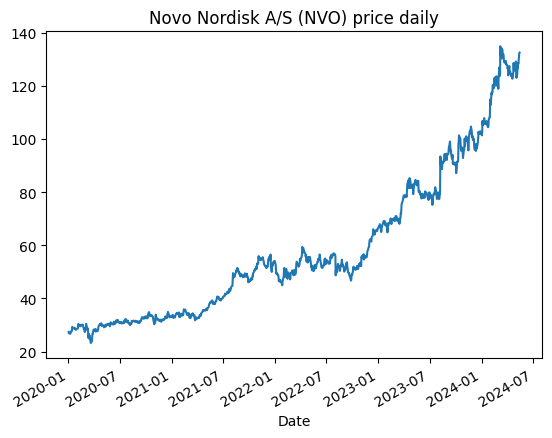

In [ ]:
# Chaining: select one column, draw a plot, of a type line
nvo_df_filtered_from_2020['Adj Close'].plot.line(title='Novo Nordisk A/S (NVO) price daily')

In [ ]:
# generating new fields (using DateTime features):

nvo_df['Ticker'] = 'NVO'
nvo_df['Year']= nvo_df.index.year
nvo_df['Month'] = nvo_df.index.month
nvo_df['Weekday'] = nvo_df.index.weekday
nvo_df['Date'] = nvo_df.index.date # to be used in joins

In [ ]:
nvo_df.tail()

,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,Weekday,Date
Date,,,,,,,,,,,
2024-05-08,127.510002,128.429993,126.620003,126.690002,126.690002,4060300,NVO,2024,5,2,2024-05-08
2024-05-09,127.440002,128.800003,126.940002,128.660004,128.660004,2374000,NVO,2024,5,3,2024-05-09
2024-05-10,129.089996,130.270004,128.330002,128.419998,128.419998,3081100,NVO,2024,5,4,2024-05-10
2024-05-13,131.470001,133.500000,130.399994,132.410004,132.410004,6142400,NVO,2024,5,0,2024-05-13
2024-05-14,132.179993,132.869995,131.320007,132.529999,132.529999,1427063,NVO,2024,5,1,2024-05-14


In [ ]:
# shift ALL values (on x periods forward (+1) and backward (-1))
# equivalent of joining with a dataframe of the same vector, but with shifted date index
nvo_df['adj_close_minus_1'] = nvo_df['Adj Close'].shift(-1)
nvo_df['adj_close_plus_1'] = nvo_df['Adj Close'].shift(1)

nvo_df.tail()

,Open,High,Low,Close,Adj Close,Volume,Ticker,Year,Month,Weekday,Date,adj_close_minus_1,adj_close_plus_1
Date,,,,,,,,,,,,,
2024-05-08,127.510002,128.429993,126.620003,126.690002,126.690002,4060300,NVO,2024,5,2,2024-05-08,128.660004,127.290001
2024-05-09,127.440002,128.800003,126.940002,128.660004,128.660004,2374000,NVO,2024,5,3,2024-05-09,128.419998,126.690002
2024-05-10,129.089996,130.270004,128.330002,128.419998,128.419998,3081100,NVO,2024,5,4,2024-05-10,132.410004,128.660004
2024-05-13,131.470001,133.500000,130.399994,132.410004,132.410004,6142400,NVO,2024,5,0,2024-05-13,132.529999,128.419998
2024-05-14,132.179993,132.869995,131.320007,132.529999,132.529999,1427063,NVO,2024,5,1,2024-05-14,NaN,132.410004


In [ ]:
# historical growth
nvo_df['growth_1d'] = nvo_df['Adj Close'] / nvo_df['Adj Close'].shift(1)           # nvo_df['adj_close_plus_1']
nvo_df['growth_30d'] = nvo_df['Adj Close'] / nvo_df['Adj Close'].shift(30)

# FUTURE Growth : for regression models
nvo_df['growth_future_1d'] = nvo_df['Adj Close'].shift(-1) / nvo_df['Adj Close']   # nvo_df['adj_close_minus_1']

# FUTURE Growth: for binary models
nvo_df['is_positive_growth_1d_future'] = np.where(nvo_df['growth_future_1d'] > 1, 1, 0)

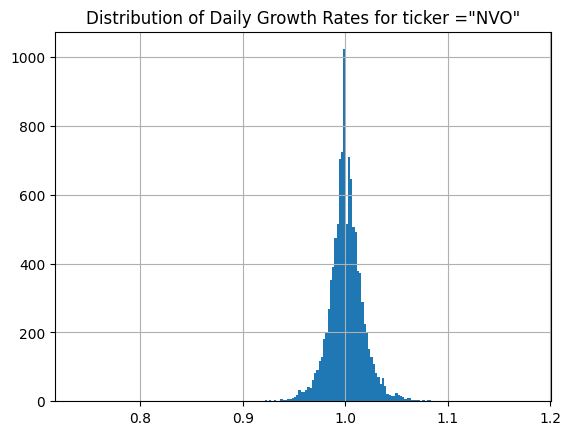

In [ ]:
# normally the growth in 1 day is +-10%, while a lot of it is around 0% (around 1.)
plt.title('Distribution of Daily Growth Rates for ticker ="NVO"')
nvo_df.growth_1d.hist(bins=200)
plt.show()

<Axes: title={'center': 'Distribution of 2-days Growth Rates for ticker = "NVO"'}>

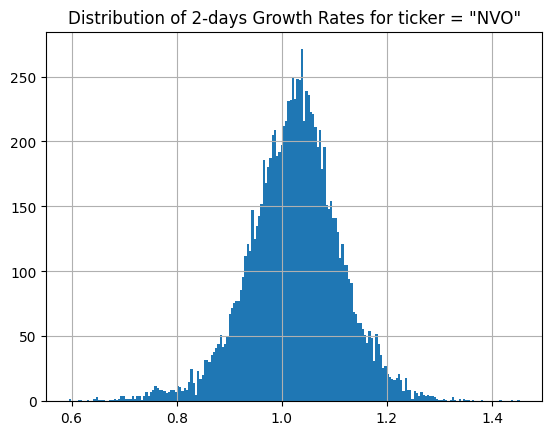

In [ ]:
# you can see that the growth is can be much wider in 30 days (+- 30%)
plt.title('Distribution of 2-days Growth Rates for ticker = "NVO"')

nvo_df.growth_30d.hist(bins=200)

In [ ]:
# for modeling: we use growth_1d, growth_2d as feature
COLUMNS = [k for k in nvo_df.keys() if k.find('growth')>=0 or k=='Adj Close']
nvo_df[COLUMNS].tail()

,Adj Close,growth_1d,growth_30d,growth_future_1d,is_positive_growth_1d_future
Date,,,,,
2024-05-08,126.690002,0.995286,0.978982,1.015550,1
2024-05-09,128.660004,1.015550,1.004764,0.998135,0
2024-05-10,128.419998,0.998135,1.000156,1.031070,1
2024-05-13,132.410004,1.031070,1.038103,1.000906,1
2024-05-14,132.529999,1.000906,1.047999,NaN,0


In [ ]:
# Calculate the distribution if future growth
nvo_df.is_positive_growth_1d_future.value_counts() / len(nvo_df)

is_positive_growth_1d_future
0    0.512764
1    0.487236
Name: count, dtype: float64

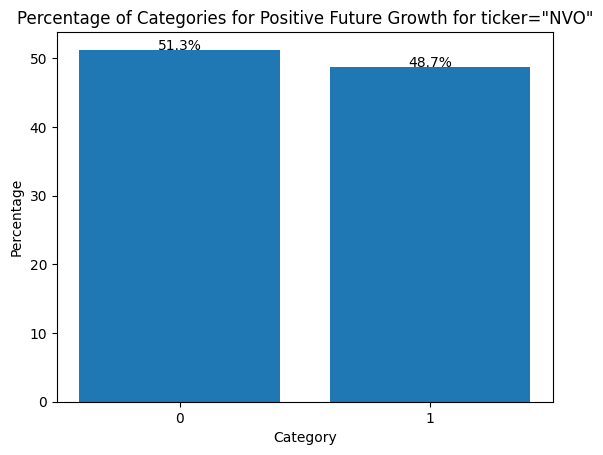

In [ ]:
# Calculate value counts
value_counts = nvo_df['is_positive_growth_1d_future'].value_counts()

# Calculate percentage of each category
percentage = (value_counts / len(nvo_df)) * 100

# Plot as a bar chart
plt.bar(percentage.index.astype(str), percentage)
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Percentage of Categories for Positive Future Growth for ticker="NVO"')

# Add percentage values on top of each bar
for i, value in enumerate(percentage):
    plt.text(i, value + 0, f'{value:.1f}%', ha='center')

plt.show()

## 2.2) [Code Snippet 6] Candlestick chart for OHLCV

In [ ]:
# Candlestick charts : https://plotly.com/python/candlestick-charts/
import plotly.graph_objects as go

fig = go.Figure(data=[go.Candlestick(x=nvo_df_filtered_from_2020.index,
                open=nvo_df_filtered_from_2020.Open,
                high=nvo_df_filtered_from_2020.High,
                low=nvo_df_filtered_from_2020.Low,
                close=nvo_df_filtered_from_2020.Close)
               ])

fig.update_layout(
    title="NVO's daily candlestick chart from 2020",
    title_x=0.5,  # Set title x-position to center
    xaxis_rangeslider_visible=True
    )

fig.show()

## 3) Macro Indicators

## 3.0) Previous indicators from module 1

In [ ]:
end = date.today()
print(f'Year = {end.year}; month= {end.month}; day={end.day}')

start = date(year=end.year-70, month=end.month, day=end.day)
print(f'Period for indexes: {start} to {end} ')

Year = 2024; month= 5; day=14
Period for indexes: 1954-05-14 to 2024-05-14 


In [ ]:
# reuse code for ealier covered indicators
dax_daily = yf.download(tickers = "^GDAXI",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
for i in [1,3,7,30,90,365]:
  #DEBUG: dax_daily['Adj Close_sh_m_'+str(i)+'d'] = dax_daily['Adj Close'].shift(i)
  dax_daily['growth_dax_'+str(i)+'d'] = dax_daily['Adj Close'] / dax_daily['Adj Close'].shift(i)

In [ ]:
dax_daily.head()

,Open,High,Low,Close,Adj Close,Volume,growth_dax_1d,growth_dax_3d,growth_dax_7d,growth_dax_30d,growth_dax_90d,growth_dax_365d
Date,,,,,,,,,,,,
1987-12-30,1005.190002,1005.190002,1005.190002,1005.190002,1005.190002,0,NaN,NaN,NaN,NaN,NaN,NaN
1988-01-04,956.489990,956.489990,956.489990,956.489990,956.489990,0,0.951551,NaN,NaN,NaN,NaN,NaN
1988-01-05,996.099976,996.099976,996.099976,996.099976,996.099976,0,1.041412,NaN,NaN,NaN,NaN,NaN
1988-01-06,1006.010010,1006.010010,1006.010010,1006.010010,1006.010010,0,1.009949,1.000816,NaN,NaN,NaN,NaN
1988-01-07,1014.469971,1014.469971,1014.469971,1014.469971,1014.469971,0,1.008409,1.060617,NaN,NaN,NaN,NaN


In [ ]:
dax_daily.tail(2)

,Open,High,Low,Close,Adj Close,Volume,growth_dax_1d,growth_dax_3d,growth_dax_7d,growth_dax_30d,growth_dax_90d,growth_dax_365d
Date,,,,,,,,,,,,
2024-05-13,18773.240234,18799.769531,18706.080078,18742.220703,18742.220703,66373100,0.998368,1.013182,1.047256,1.014349,1.133255,1.297254
2024-05-14,18735.839844,18748.759766,18629.029297,18720.789062,18720.789062,0,0.998857,1.001830,1.039951,1.012345,1.126585,1.305204


In [ ]:
GROWTH_KEYS = [k for k in dax_daily.keys() if k.startswith('growth')]
dax_daily_to_merge = dax_daily[GROWTH_KEYS]
dax_daily_to_merge.tail(1)

,growth_dax_1d,growth_dax_3d,growth_dax_7d,growth_dax_30d,growth_dax_90d,growth_dax_365d
Date,,,,,,
2024-05-14,0.998857,1.00183,1.039951,1.012345,1.126585,1.305204


In [ ]:
def get_growth_df(df:pd.DataFrame, prefix:str)->pd.DataFrame:
  for i in [1,3,7,30,90,365]:
    df['growth_'+prefix+'_'+str(i)+'d'] = df['Adj Close'] / df['Adj Close'].shift(i)
    GROWTH_KEYS = [k for k in df.keys() if k.startswith('growth')]
  return df[GROWTH_KEYS]

In [ ]:
# https://finance.yahoo.com/quote/%5EGSPC/
# SNP - SNP Real Time Price. Currency in USD
snp500_daily = yf.download(tickers = "^GSPC",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
snp500_to_merge = get_growth_df(snp500_daily,'snp500')
snp500_to_merge.tail(2)

,growth_snp500_1d,growth_snp500_3d,growth_snp500_7d,growth_snp500_30d,growth_snp500_90d,growth_snp500_365d
Date,,,,,,
2024-05-13,0.999759,1.006506,1.031045,0.995738,1.109805,1.317230
2024-05-14,1.001569,1.002978,1.019856,1.004572,1.115369,1.321399


In [ ]:
# Dow Jones Industrial Average: https://finance.yahoo.com/quote/%5EDJI?.tsrc=fin-srch
dji_daily = yf.download(tickers = "^DJI",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
dji_daily_to_merge = get_growth_df(dji_daily,'dji')
dji_daily_to_merge.tail(2)

,growth_dji_1d,growth_dji_3d,growth_dji_7d,growth_dji_30d,growth_dji_90d,growth_dji_365d
Date,,,,,,
2024-05-13,0.997942,1.009605,1.031546,0.996579,1.053468,1.164908
2024-05-14,1.000553,1.001664,1.020106,1.007226,1.053764,1.165446


In [ ]:
# ETFs
# WisdomTree India Earnings Fund (EPI)
# NYSEArca - Nasdaq Real Time Price. Currency in USD
# WEB: https://finance.yahoo.com/quote/EPI/history?p=EPI
epi_etf_daily = yf.download(tickers = "EPI",
                     period = "max",
                     interval = "1d")
epi_etf_daily.tail(2)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-13,44.160000,44.310001,44.139999,44.180000,44.180000,451400
2024-05-14,44.669998,44.759998,44.634998,44.740002,44.740002,166791


In [ ]:
epi_etf_daily_to_merge = get_growth_df(epi_etf_daily,'epi')
epi_etf_daily_to_merge.tail(2)

,growth_epi_1d,growth_epi_3d,growth_epi_7d,growth_epi_30d,growth_epi_90d,growth_epi_365d
Date,,,,,,
2024-05-13,1.006378,0.991695,0.966740,1.010984,1.078613,1.334280
2024-05-14,1.012675,1.015203,0.982002,1.019599,1.084080,1.341085


In [ ]:
# Real Potential Gross Domestic Product (GDPPOT), Billions of Chained 2012 Dollars, QUARTERLY
# https://fred.stlouisfed.org/series/GDPPOT
gdppot = pdr.DataReader("GDPPOT", "fred", start=start)
gdppot['gdppot_us_yoy'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(4)-1
gdppot['gdppot_us_qoq'] = gdppot.GDPPOT/gdppot.GDPPOT.shift(1)-1
gdppot.tail(2)

,GDPPOT,gdppot_us_yoy,gdppot_us_qoq
DATE,,,
2024-01-01,22618.15,0.022251,0.005466
2024-04-01,22739.00,0.022151,0.005343


In [ ]:
gdppot_to_merge = gdppot[['gdppot_us_yoy','gdppot_us_qoq']]
gdppot_to_merge.tail(1)

,gdppot_us_yoy,gdppot_us_qoq
DATE,,
2024-04-01,0.022151,0.005343


In [ ]:
# # "Core CPI index", MONTHLY
# https://fred.stlouisfed.org/series/CPILFESL
# The "Consumer Price Index for All Urban Consumers: All Items Less Food & Energy"
# is an aggregate of prices paid by urban consumers for a typical basket of goods, excluding food and energy.
# This measurement, known as "Core CPI," is widely used by economists because food and energy have very volatile prices.
cpilfesl = pdr.DataReader("CPILFESL", "fred", start=start)
cpilfesl['cpi_core_yoy'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(12)-1
cpilfesl['cpi_core_mom'] = cpilfesl.CPILFESL/cpilfesl.CPILFESL.shift(1)-1

cpilfesl.tail(2)

,CPILFESL,cpi_core_yoy,cpi_core_mom
DATE,,,
2024-02-01,315.565,0.037620,0.003584
2024-03-01,316.698,0.037973,0.003590


In [ ]:
cpilfesl_to_merge = cpilfesl[['cpi_core_yoy','cpi_core_mom']]
cpilfesl_to_merge.tail(2)

,cpi_core_yoy,cpi_core_mom
DATE,,
2024-02-01,0.037620,0.003584
2024-03-01,0.037973,0.003590


In [ ]:
# Fed rate https://fred.stlouisfed.org/series/FEDFUNDS
fedfunds = pdr.DataReader("FEDFUNDS", "fred", start=start)
fedfunds.tail(2)

,FEDFUNDS
DATE,
2024-03-01,5.33
2024-04-01,5.33


In [ ]:
# https://fred.stlouisfed.org/series/DGS1
dgs1 = pdr.DataReader("DGS1", "fred", start=start)
dgs1.tail(2)

,DGS1
DATE,
2024-05-09,5.12
2024-05-10,5.17


In [ ]:
# https://fred.stlouisfed.org/series/DGS5
dgs5 = pdr.DataReader("DGS5", "fred", start=start)
dgs5.tail(2)

,DGS5
DATE,
2024-05-09,4.47
2024-05-10,4.52


In [ ]:
# https://fred.stlouisfed.org/series/DGS10
dgs10 = pdr.DataReader("DGS10", "fred", start=start)
dgs10.tail(2)

,DGS10
DATE,
2024-05-09,4.45
2024-05-10,4.50


## 3.1) [Code snippet 3] VIX - Volatility Index

In [ ]:
# VIX - Volatility Index
# https://finance.yahoo.com/quote/%5EVIX/
vix = yf.download(tickers = "^VIX",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
vix.tail(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-13,13.26,13.66,13.25,13.60,13.60,0
2024-05-14,13.71,14.03,13.56,13.56,13.56,0


In [ ]:
vix_to_merge = vix['Adj Close']
vix_to_merge.tail()

Date
2024-05-08    13.00
2024-05-09    12.69
2024-05-10    12.55
2024-05-13    13.60
2024-05-14    13.56
Name: Adj Close, dtype: float64

<Axes: title={'center': 'VIX value over time'}, xlabel='Date'>

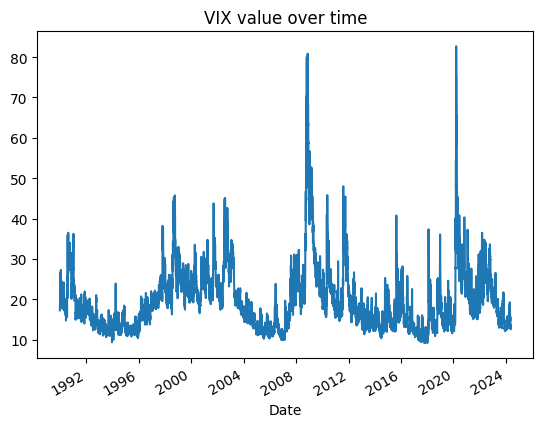

In [ ]:
# Static graphs: hard to zoom in and get the exact dates of spikes
vix['Adj Close'].plot.line(title = "VIX value over time")

In [ ]:
# Dynamic visualisation of VIX prices
fig = px.line(vix,
              x=vix.index,
              y="Adj Close",
              title='VIX over time')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()

## 3.2) Gold - other assets

In [ ]:
# GOLD
# WEB: https://finance.yahoo.com/quote/GC%3DF
gold = yf.download(tickers = "GC=F",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
gold.tail(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-14,2342.300049,2362.899902,2340.5,2358.300049,2358.300049,140369


In [ ]:
gold_to_merge = get_growth_df(gold,'gold')
gold_to_merge.tail(2)

,growth_gold_1d,growth_gold_3d,growth_gold_7d,growth_gold_30d,growth_gold_90d,growth_gold_365d
Date,,,,,,
2024-05-13,0.986820,1.009725,1.016049,1.044534,1.148412,1.336136
2024-05-14,1.009503,1.011234,1.025794,1.043034,1.154728,1.350687


In [ ]:
# Dynamic visualisation of GOLD prices
fig = px.line(gold,
              x=gold.index,
              y="Adj Close",
              title='GOLD over time')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()

## 3.3) WTI Crude and Brent Oil

In [ ]:
# WTI Crude Oil
# WEB: https://uk.finance.yahoo.com/quote/CL=F/
crude_oil = yf.download(tickers = "CL=F",
                     period = "max",
                     interval = "1d")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
crude_oil.tail(2)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-13,78.180000,79.489998,77.779999,79.120003,79.120003,281169
2024-05-14,79.230003,79.379997,77.680000,78.089996,78.089996,160551


In [ ]:
crude_oil_to_merge = get_growth_df(crude_oil,'wti_oil')
crude_oil_to_merge.tail(2)

,growth_wti_oil_1d,growth_wti_oil_3d,growth_wti_oil_7d,growth_wti_oil_30d,growth_wti_oil_90d,growth_wti_oil_365d
Date,,,,,,
2024-05-13,1.010989,1.001646,1.002153,0.945168,1.088308,1.011765
2024-05-14,0.986982,0.985238,0.999744,0.917087,1.081729,0.969460


In [ ]:
# Dynamic visualisation
fig = px.line(crude_oil,
              x=crude_oil.index,
              y="Adj Close",
              title='WTI Crude Oil over time')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()

In [ ]:
# Brent Oil
# WEB: https://uk.finance.yahoo.com/quote/BZ=F/
brent_oil = yf.download(tickers = "BZ=F",
                     period = "max",
                     interval = "1d")

brent_oil.tail(2)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-13,82.699997,83.830002,82.260002,83.360001,83.360001,25062
2024-05-14,83.500000,83.620003,82.099998,82.389999,82.389999,19151


In [ ]:
brent_oil_to_merge = get_growth_df(brent_oil,'brent_oil')
brent_oil_to_merge.tail(2)

,growth_brent_oil_1d,growth_brent_oil_3d,growth_brent_oil_7d,growth_brent_oil_30d,growth_brent_oil_90d,growth_brent_oil_365d
Date,,,,,,
2024-05-13,1.006885,0.997368,0.996295,0.953558,1.065304,1.003974
2024-05-14,0.988364,0.982237,0.993129,0.926563,1.061864,0.964415


In [ ]:
# Dynamic visualisation
fig = px.line(brent_oil,
              x=brent_oil.index,
              y="Adj Close",
              title='Brent Oil over time')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()


## 3.4) Bitcoin prices: BTC_USD

In [ ]:
# https://finance.yahoo.com/quote/BTC-USD/
btc_usd =  yf.download(tickers = "BTC-USD",
                     period = "max",
                     interval = "1d")

btc_usd.tail(2)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-05-13,61451.218750,63422.660156,60769.839844,62901.449219,62901.449219,27889181179
2024-05-14,62914.046875,63056.210938,61128.417969,61869.164062,61869.164062,28957253632


In [ ]:
btc_usd_to_merge = get_growth_df(btc_usd,'btc_usd')
btc_usd_to_merge.tail(2)

,growth_btc_usd_1d,growth_btc_usd_3d,growth_btc_usd_7d,growth_btc_usd_30d,growth_btc_usd_90d,growth_btc_usd_365d
Date,,,,,,
2024-05-13,1.023647,1.034686,0.995876,0.985584,1.264543,2.335684
2024-05-14,0.983589,1.017690,0.992530,0.941137,1.193770,2.275213


In [ ]:
# Dynamic visualisation
fig = px.line(btc_usd,
              x=btc_usd.index,
              y="Adj Close",
              title='Bitcoin price daily')
fig.update_layout(title_x=0.5)  # This will center the title horizontally

fig.show()


## 3.5 [Code snippet 4] Eurostat: "The home of high-quality statistics and data on Europe"


In [ ]:
!pip install eurostat

# https://pypi.org/project/eurostat/
# https://ec.europa.eu/eurostat/web/main/data/database

In [ ]:
import eurostat

In [ ]:
# LONG WAIT TIME ~15 min, unless you filter data

# https://ec.europa.eu/eurostat/cache/metadata/en/irt_euryld_esms.htm
  # Euro yield curves (irt_euryld)
  # Reference Metadata in Euro SDMX Metadata Structure (ESMS)
  # Compiling agency: Eurostat, the statistical office of the European Uni

# the service is slow, you need to specify addtional params : https://pypi.org/project/eurostat/0.2.3/

filter_pars = {'startPeriod':'2024-04-01', 'endPeriod':'2024-05-01'}

code = 'irt_euryld_d'
eurostat_euro_yield_df = eurostat.get_data_df(code, flags=True, filter_pars=filter_pars,  verbose=True)

Download progress: 100.0%



In [ ]:
eurostat_euro_yield_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2148 entries, 0 to 2147
Data columns (total 45 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   freq              2148 non-null   object 
 1   yld_curv          2148 non-null   object 
 2   maturity          2148 non-null   object 
 3   bonds             2148 non-null   object 
 4   geo\TIME_PERIOD   2148 non-null   object 
 5   2024-04-02_value  2148 non-null   float64
 6   2024-04-02_flag   2148 non-null   object 
 7   2024-04-03_value  2148 non-null   float64
 8   2024-04-03_flag   2148 non-null   object 
 9   2024-04-04_value  2148 non-null   float64
 10  2024-04-04_flag   2148 non-null   object 
 11  2024-04-05_value  2148 non-null   float64
 12  2024-04-05_flag   2148 non-null   object 
 13  2024-04-08_value  2148 non-null   float64
 14  2024-04-08_flag   2148 non-null   object 
 15  2024-04-09_value  2148 non-null   float64
 16  2024-04-09_flag   2148 non-null   object 


In [ ]:
eurostat_euro_yield_df.head()

,freq,yld_curv,maturity,bonds,geo\TIME_PERIOD,2024-04-02_value,2024-04-02_flag,2024-04-03_value,2024-04-03_flag,2024-04-04_value,...,2024-04-23_value,2024-04-23_flag,2024-04-24_value,2024-04-24_flag,2024-04-25_value,2024-04-25_flag,2024-04-26_value,2024-04-26_flag,2024-04-29_value,2024-04-29_flag
0,D,INS_FWD,M10,CGB_EA,EA,2.93540,,2.97183,,2.92502,...,3.02264,,3.08430,,3.13182,,3.08867,,3.06128,
1,D,INS_FWD,M10,CGB_EA_AAA,EA,2.84475,,2.86360,,2.83422,...,2.91176,,2.96612,,3.01979,,2.98661,,2.95786,
2,D,INS_FWD,M11,CGB_EA,EA,2.87170,,2.90848,,2.85814,...,2.96704,,3.03342,,3.08275,,3.03647,,3.00758,
3,D,INS_FWD,M11,CGB_EA_AAA,EA,2.76744,,2.78547,,2.75286,...,2.84353,,2.90169,,2.95777,,2.92274,,2.89261,
4,D,INS_FWD,M3,CGB_EA,EA,3.61646,,3.63975,,3.62033,...,3.59855,,3.61313,,3.64745,,3.63097,,3.61332,


In [ ]:
eurostat_euro_yield_df['bonds'].value_counts()

bonds
CGB_EA        1074
CGB_EA_AAA    1074
Name: count, dtype: int64

In [ ]:
eurostat_euro_yield_df['maturity'].value_counts()


maturity
M10       6
Y26_M8    6
Y28_M4    6
Y28_M3    6
Y28_M2    6
         ..
Y18_M9    6
Y18_M8    6
Y18_M7    6
Y18_M6    6
Y9_M9     6
Name: count, Length: 358, dtype: int64

In [ ]:
eurostat_euro_yield_df['yld_curv'].value_counts()

yld_curv
INS_FWD    716
PAR        716
SPOT_RT    716
Name: count, dtype: int64

In [ ]:
eurostat_euro_yield_df

,freq,yld_curv,maturity,bonds,geo\TIME_PERIOD,2024-04-02_value,2024-04-02_flag,2024-04-03_value,2024-04-03_flag,2024-04-04_value,...,2024-04-23_value,2024-04-23_flag,2024-04-24_value,2024-04-24_flag,2024-04-25_value,2024-04-25_flag,2024-04-26_value,2024-04-26_flag,2024-04-29_value,2024-04-29_flag
0,D,INS_FWD,M10,CGB_EA,EA,2.93540,,2.97183,,2.92502,...,3.02264,,3.08430,,3.13182,,3.08867,,3.06128,
1,D,INS_FWD,M10,CGB_EA_AAA,EA,2.84475,,2.86360,,2.83422,...,2.91176,,2.96612,,3.01979,,2.98661,,2.95786,
2,D,INS_FWD,M11,CGB_EA,EA,2.87170,,2.90848,,2.85814,...,2.96704,,3.03342,,3.08275,,3.03647,,3.00758,
3,D,INS_FWD,M11,CGB_EA_AAA,EA,2.76744,,2.78547,,2.75286,...,2.84353,,2.90169,,2.95777,,2.92274,,2.89261,
4,D,INS_FWD,M3,CGB_EA,EA,3.61646,,3.63975,,3.62033,...,3.59855,,3.61313,,3.64745,,3.63097,,3.61332,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2143,D,SPOT_RT,Y9_M7,CGB_EA_AAA,EA,2.46991,,2.46791,,2.39559,...,2.54635,,2.62834,,2.68168,,2.60908,,2.57881,
2144,D,SPOT_RT,Y9_M8,CGB_EA,EA,3.05403,,3.06662,,2.97186,...,3.07345,,3.16620,,3.23291,,3.14712,,3.10632,
2145,D,SPOT_RT,Y9_M8,CGB_EA_AAA,EA,2.47321,,2.47116,,2.39873,...,2.54935,,2.63147,,2.68473,,2.61196,,2.58177,
2146,D,SPOT_RT,Y9_M9,CGB_EA,EA,3.05847,,3.07104,,2.97618,...,3.07734,,3.17017,,3.23687,,3.15093,,3.11021,


In [ ]:
# Visual graph: https://www.ecb.europa.eu/stats/financial_markets_and_interest_rates/euro_area_yield_curves/html/index.en.html
FILTER = (eurostat_euro_yield_df.yld_curv=='SPOT_RT')& (eurostat_euro_yield_df.bonds=='CGB_EA_AAA')
filtered_eurostat_euro_yield_df = eurostat_euro_yield_df[FILTER]

In [ ]:
filtered_eurostat_euro_yield_df.sort_values(by='maturity')[['maturity','2024-04-18_value']].head(20)

,maturity,2024-04-18_value
1433,M10,3.36335
1435,M11,3.31940
1437,M3,3.72264
1439,M4,3.66536
1441,M5,3.61017
1443,M6,3.55700
1445,M7,3.50580
1447,M8,3.45649
1449,M9,3.40903
1451,Y1,3.27711


In [ ]:
import re

def extract_numbers(input_string):
    y_match = re.search(r'Y(\d+)', input_string)
    m_match = re.search(r'M(\d+)', input_string)

    y_number = int(y_match.group(1)) if y_match else 0
    m_number = int(m_match.group(1)) if m_match else 0


    return y_number*12 + m_number

# Examples
examples = ["Y10_M2", "M3", "Y1"]
for example in examples:
    res = extract_numbers(example)
    print(f"{example} ==> {res}")

Y10_M2 ==> 122
M3 ==> 3
Y1 ==> 12


In [ ]:
# define new field: "maturity in months"
filtered_eurostat_euro_yield_df['maturity_in_months'] = filtered_eurostat_euro_yield_df.maturity.apply(lambda x:extract_numbers(x))

<ipython-input-135-ffa8baf09650>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
filtered_eurostat_euro_yield_df.sort_values(by='maturity_in_months')[['maturity','maturity_in_months','2024-04-18_value']].head(20)

,maturity,maturity_in_months,2024-04-18_value
1437,M3,3,3.72264
1439,M4,4,3.66536
1441,M5,5,3.61017
1443,M6,6,3.55700
1445,M7,7,3.50580
1447,M8,8,3.45649
1449,M9,9,3.40903
1433,M10,10,3.36335
1435,M11,11,3.31940
1451,Y1,12,3.27711


In [ ]:
filtered_eurostat_euro_yield_df.loc[:,'maturity_in_years'] = filtered_eurostat_euro_yield_df.maturity_in_months/12.0

<ipython-input-137-c3c6c300f9f8>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Axes: title={'center': 'AAA rated bonds spot yield curve'}, xlabel='maturity_in_years'>

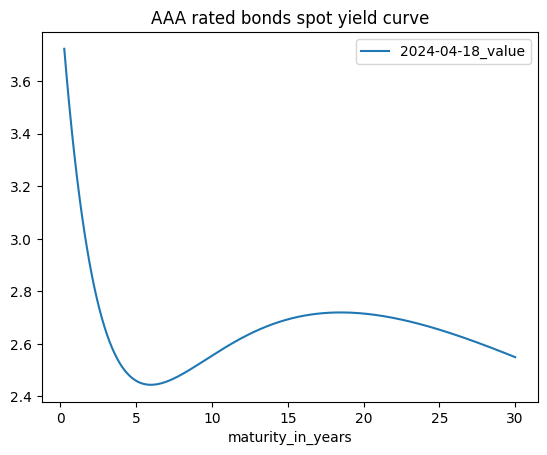

In [ ]:
# exactly the same as on the Web:  https://www.ecb.europa.eu/stats/financial_markets_and_interest_rates/euro_area_yield_curves/html/index.en.html
filtered_eurostat_euro_yield_df \
  .sort_values(by='maturity_in_months')[['maturity_in_years','2024-04-18_value']] \
  .plot.line(x='maturity_in_years',
            y='2024-04-18_value',
            title='AAA rated bonds spot yield curve')

## 4) [Code Snippet 5] Fundamental indicators

* Read about "Ratio Analysis" to learn about more ratios: https://www.investopedia.com/terms/r/ratioanalysis.asp
* https://algotrading101.com/learn/yahoo-finance-api-guide/

In [ ]:
# let's select some set of stocks: e.g. top US companies on 'Employees':
# https://companiesmarketcap.com/usa/largest-american-companies-by-number-of-employees/

US_TOP_EMPLOYEES_STOCKS = ['WMT','AMZN','UPS','HD','CNXC','TGT','KR','UNH','BRK-B','SBUX']

# WMT
ticker = US_TOP_EMPLOYEES_STOCKS[0]

# WMT ticker
one_company = yf.Ticker(ticker)

In [ ]:
# Fundamental info appears close earning dates, you need to download it and use quickly (before/after trading day),
#  unless you're a fundamental long-term investor looking for a several months-quarters-years strategy (period between buy and sell)
# This dfthis is the easiest thing to join with the main dataset and get "some" technical indicators present
eps_earnings = one_company.earnings_dates
eps_earnings['Ticker'] = ticker
eps_earnings

KeyError: 'Earnings Date'

In [ ]:
one_company.calendar

In [ ]:
one_company.financials

In [ ]:
EPS = one_company.financials.loc['Basic EPS']
EPS

In [ ]:
# or should we use NORMALIZED_EBITDA?
EBITDA = one_company.financials.loc['EBITDA']
EBITDA_margin = one_company.financials.loc['EBITDA'] /  one_company.financials.loc['Total Revenue']

In [ ]:
EBITDA_margin

In [ ]:
NET_INCOME = one_company.financials.loc['Net Income']
NET_INCOME_margin = one_company.financials.loc['Net Income'] /  one_company.financials.loc['Total Revenue']

In [ ]:
NET_INCOME

In [ ]:
# Compare with Public information - you can fully replicate the numbers (yearly and/or quarterly):
# https://www.wsj.com/market-data/quotes/WMT/financials/annual/income-statement
NET_INCOME_margin

In [ ]:
# Combine the series into a DataFrame
df_fin_ratios = pd.DataFrame({
    'NET_INCOME_margin': 100.0 * NET_INCOME_margin, #for visualisation -- Margin in %
    'EBITDA_margin': 100.0 *EBITDA_margin, #for visualisation -- Margin in %
    'EPS': EPS
})

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Assuming df_fin_ratios is your DataFrame containing the financial ratios
# Make sure you have already created this DataFrame

# Plotting the specified columns
ax = df_fin_ratios[['NET_INCOME_margin','EBITDA_margin']].plot.line()

# Setting the y-axis formatter to display values as percentages
ax.yaxis.set_major_formatter(mtick.PercentFormatter())

# Adding title
plt.title('NET INCOME Margin vs EBITDA Margin')

# Displaying the plot
plt.show()

In [ ]:
EPS_year = df_fin_ratios['EPS'].index.year

df_fin_ratios['EPS'].plot.bar(title = 'EPS yearly for Walmart (WMT)')

plt.xticks(range(len(EPS_year)), EPS_year)
# Displaying the plot
plt.show()

## 5) [Code snippet 7] Daily OHCLV data for a set of stocks

In [ ]:
# https://companiesmarketcap.com/usa/largest-companies-in-the-usa-by-market-cap/
US_STOCKS = ['MSFT', 'AAPL', 'GOOG', 'NVDA', 'AMZN', 'META', 'BRK-B', 'LLY', 'AVGO','V', 'JPM']

# You're required to add EU_STOCKS and INDIA_STOCS
# https://companiesmarketcap.com/european-union/largest-companies-in-the-eu-by-market-cap/
EU_STOCKS = ['NVO','MC.PA', 'ASML', 'RMS.PA', 'OR.PA', 'SAP', 'ACN', 'TTE', 'SIE.DE','IDEXY','CDI.PA']

# https://companiesmarketcap.com/india/largest-companies-in-india-by-market-cap/
INDIA_STOCKS = ['RELIANCE.NS','TCS.NS','HDB','BHARTIARTL.NS','IBN','SBIN.NS','LICI.NS','INFY','ITC.NS','HINDUNILVR.NS','LT.NS']

In [ ]:
ALL_TICKERS = US_STOCKS  + EU_STOCKS + INDIA_STOCKS
ALL_TICKERS

In [ ]:
import time

stocks_df = pd.DataFrame({'A' : []})

for i,ticker in enumerate(ALL_TICKERS):
  print(i,ticker)

  # Work with stock prices
  historyPrices = yf.download(tickers = ticker,
                     period = "max",
                     interval = "1d")

  # generate features for historical prices, and what we want to predict
  historyPrices['Ticker'] = ticker
  historyPrices['Year']= historyPrices.index.year
  historyPrices['Month'] = historyPrices.index.month
  historyPrices['Weekday'] = historyPrices.index.weekday
  historyPrices['Date'] = historyPrices.index.date

  # historical returns
  for i in [1,3,7,30,90,365]:
    historyPrices['growth_'+str(i)+'d'] = historyPrices['Adj Close'] / historyPrices['Adj Close'].shift(i)
  historyPrices['growth_future_5d'] = historyPrices['Adj Close'].shift(-5) / historyPrices['Adj Close']

  # Technical indicators
  # SimpleMovingAverage 10 days and 20 days
  historyPrices['SMA10']= historyPrices['Close'].rolling(10).mean()
  historyPrices['SMA20']= historyPrices['Close'].rolling(20).mean()
  historyPrices['growing_moving_average'] = np.where(historyPrices['SMA10'] > historyPrices['SMA20'], 1, 0)
  historyPrices['high_minus_low_relative'] = (historyPrices.High - historyPrices.Low) / historyPrices['Adj Close']

  # 30d rolling volatility : https://ycharts.com/glossary/terms/rolling_vol_30
  historyPrices['volatility'] =   historyPrices['Adj Close'].rolling(30).std() * np.sqrt(252)

  # what we want to predict
  historyPrices['is_positive_growth_5d_future'] = np.where(historyPrices['growth_future_5d'] > 1, 1, 0)

  # sleep 1 sec between downloads - not to overload the API server
  time.sleep(1)


  if stocks_df.empty:
    stocks_df = historyPrices
  else:
    stocks_df = pd.concat([stocks_df, historyPrices], ignore_index=True)

In [ ]:
def get_ticker_type(ticker:str, us_stocks_list, eu_stocks_list, india_stocks_list):
  if ticker in us_stocks_list:
    return 'US'
  elif ticker in eu_stocks_list:
    return 'EU'
  elif ticker in india_stocks_list:
    return 'INDIA'
  else:
    return 'ERROR'


In [ ]:
stocks_df['ticker_type'] = stocks_df.Ticker.apply(lambda x:get_ticker_type(x, US_STOCKS, EU_STOCKS, INDIA_STOCKS))

In [ ]:
# count of observations between US-EU-INDIA stocks
stocks_df.ticker_type.value_counts()

In [ ]:
# unique tickers
stocks_df.Ticker.nunique()

In [ ]:
# count of observations by stock
stocks_df.Ticker.value_counts()

In [ ]:
stocks_df.groupby(['Ticker','ticker_type']).Date.agg(['min','max'])

In [ ]:
#  average growth 365days
stocks_df[stocks_df.Year>=2020].groupby(by=['Year','ticker_type']).growth_365d.mean()

In [ ]:
stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])

In [ ]:
# filtering only on stats after 2000
stocks_df[stocks_df.Date>='2000-01-01'].info()

In [ ]:
stocks_df[stocks_df.Date=='2024-04-01'].tail()

## 6) [Code Snippet 8] Technical Indicators with TA-lib
* PythonInvest article on Tech. Indicators
* Code for generating 100+ tech. indicators/patterns : https://github.com/realmistic/PythonInvest-basic-fin-analysis/blob/master/colab_notebooks/Part14_Exploring_Tech_Indicators_For_Stocks_and_Crypto.ipynb

Indicator groups: https://github.com/TA-Lib/ta-lib-python/blob/master/README.md

* Overlap Studies (17)
* Momentum Indicators (30+)
* Volume Indicators (3)
* Cycle Indicators (5)
* Price Transform (4)
* Volatility Indicators (3)
* Pattern Recognition (60)

In [ ]:
# https://stackoverflow.com/questions/49648391/how-to-install-ta-lib-in-google-colab
# Update (apr 2023): Colab is now Python 3.10
# there are some other (older) ways to install talib

url = 'https://anaconda.org/conda-forge/libta-lib/0.4.0/download/linux-64/libta-lib-0.4.0-h166bdaf_1.tar.bz2'
!curl -L $url | tar xj -C /usr/lib/x86_64-linux-gnu/ lib --strip-components=1
url = 'https://anaconda.org/conda-forge/ta-lib/0.4.19/download/linux-64/ta-lib-0.4.19-py310hde88566_4.tar.bz2'
!curl -L $url | tar xj -C /usr/local/lib/python3.10/dist-packages/ lib/python3.10/site-packages/talib --strip-components=3
import talib

## 6.1) Momentum indicators
https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/momentum_indicators.md

In [ ]:
def talib_get_momentum_indicators_for_one_ticker(df: pd.DataFrame) -> pd.DataFrame:
  # ADX - Average Directional Movement Index
  talib_momentum_adx = talib.ADX(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # ADXR - Average Directional Movement Index Rating
  talib_momentum_adxr = talib.ADXR(df.High.values, df.Low.values, df.Close.values, timeperiod=14 )
  # APO - Absolute Price Oscillator
  talib_momentum_apo = talib.APO(df.Close.values, fastperiod=12, slowperiod=26, matype=0 )
  # AROON - Aroon
  talib_momentum_aroon = talib.AROON(df.High.values, df.Low.values, timeperiod=14 )
  # talib_momentum_aroon[0].size
  # talib_momentum_aroon[1].size
  # AROONOSC - Aroon Oscillator
  talib_momentum_aroonosc = talib.AROONOSC(df.High.values, df.Low.values, timeperiod=14)
  # BOP - Balance of Power
  # https://school.stockcharts.com/doku.php?id=technical_indicators:balance_of_power
     #calculate open prices as shifted closed prices from the prev day
     # open = df.Last.shift(1)
  talib_momentum_bop = talib.BOP(df.Open.values, df.High.values, df.Low.values, df.Close.values)
  # CCI - Commodity Channel Index
  talib_momentum_cci = talib.CCI(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # CMO - Chande Momentum Oscillator
  talib_momentum_cmo = talib.CMO(df.Close.values, timeperiod=14)
  # DX - Directional Movement Index
  talib_momentum_dx = talib.DX(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # MACD - Moving Average Convergence/Divergence
  talib_momentum_macd, talib_momentum_macdsignal, talib_momentum_macdhist = talib.MACD(df.Close.values, fastperiod=12, \
                                                                                       slowperiod=26, signalperiod=9)
  # MACDEXT - MACD with controllable MA type
  talib_momentum_macd_ext, talib_momentum_macdsignal_ext, talib_momentum_macdhist_ext = talib.MACDEXT(df.Close.values, \
                                                                                                    fastperiod=12, \
                                                                                                    fastmatype=0, \
                                                                                                    slowperiod=26, \
                                                                                                    slowmatype=0, \
                                                                                                    signalperiod=9, \
                                                                                                  signalmatype=0)
  # MACDFIX - Moving Average Convergence/Divergence Fix 12/26
  talib_momentum_macd_fix, talib_momentum_macdsignal_fix, talib_momentum_macdhist_fix = talib.MACDFIX(df.Close.values, \
                                                                                                      signalperiod=9)
  # MFI - Money Flow Index
  talib_momentum_mfi = talib.MFI(df.High.values, df.Low.values, df.Close.values, df.Volume.values, timeperiod=14)
  # MINUS_DI - Minus Directional Indicator
  talib_momentum_minus_di = talib.MINUS_DM(df.High.values, df.Low.values, timeperiod=14)
  # MOM - Momentum
  talib_momentum_mom = talib.MOM(df.Close.values, timeperiod=10)
  # PLUS_DI - Plus Directional Indicator
  talib_momentum_plus_di = talib.PLUS_DI(df.High.values, df.Low.values, df.Close.values, timeperiod=14)
  # PLUS_DM - Plus Directional Movement
  talib_momentum_plus_dm = talib.PLUS_DM(df.High.values, df.Low.values, timeperiod=14)
  # PPO - Percentage Price Oscillator
  talib_momentum_ppo = talib.PPO(df.Close.values, fastperiod=12, slowperiod=26, matype=0)
  # ROC - Rate of change : ((price/prevPrice)-1)*100
  talib_momentum_roc = talib.ROC(df.Close.values, timeperiod=10)
  # ROCP - Rate of change Percentage: (price-prevPrice)/prevPrice
  talib_momentum_rocp = talib.ROCP(df.Close.values, timeperiod=10)
  # ROCR - Rate of change ratio: (price/prevPrice)
  talib_momentum_rocr = talib.ROCR(df.Close.values, timeperiod=10)
  # ROCR100 - Rate of change ratio 100 scale: (price/prevPrice)*100
  talib_momentum_rocr100 = talib.ROCR100(df.Close.values, timeperiod=10)
  # RSI - Relative Strength Index
  talib_momentum_rsi = talib.RSI(df.Close.values, timeperiod=14)
  # STOCH - Stochastic
  talib_momentum_slowk, talib_momentum_slowd = talib.STOCH(df.High.values, df.Low.values, df.Close.values, \
                                                           fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)
  # STOCHF - Stochastic Fast
  talib_momentum_fastk, talib_momentum_fastd = talib.STOCHF(df.High.values, df.Low.values, df.Close.values, \
                                                            fastk_period=5, fastd_period=3, fastd_matype=0)
  # STOCHRSI - Stochastic Relative Strength Index
  talib_momentum_fastk_rsi, talib_momentum_fastd_rsi = talib.STOCHRSI(df.Close.values, timeperiod=14, \
                                                                      fastk_period=5, fastd_period=3, fastd_matype=0)
  # TRIX - 1-day Rate-Of-Change (ROC) of a Triple Smooth EMA
  talib_momentum_trix = talib.TRIX(df.Close.values, timeperiod=30)
  # ULTOSC - Ultimate Oscillator
  talib_momentum_ultosc = talib.ULTOSC(df.High.values, df.Low.values, df.Close.values, timeperiod1=7, timeperiod2=14, timeperiod3=28)
  # WILLR - Williams' %R
  talib_momentum_willr = talib.WILLR(df.High.values, df.Low.values, df.Close.values, timeperiod=14)

  momentum_df =   pd.DataFrame(
    {
      # assume here multi-index <dateTime, ticker>
      # 'datetime': df.index.get_level_values(0),
      # 'ticker': df.index.get_level_values(1) ,

      # old way with separate columns
      'Date': df.Date.values,
      'Ticker': df.Ticker,

      'adx': talib_momentum_adx,
      'adxr': talib_momentum_adxr,
      'apo': talib_momentum_apo,
      'aroon_1': talib_momentum_aroon[0] ,
      'aroon_2': talib_momentum_aroon[1],
      'aroonosc': talib_momentum_aroonosc,
      'bop': talib_momentum_bop,
      'cci': talib_momentum_cci,
      'cmo': talib_momentum_cmo,
      'dx': talib_momentum_dx,
      'macd': talib_momentum_macd,
      'macdsignal': talib_momentum_macdsignal,
      'macdhist': talib_momentum_macdhist,
      'macd_ext': talib_momentum_macd_ext,
      'macdsignal_ext': talib_momentum_macdsignal_ext,
      'macdhist_ext': talib_momentum_macdhist_ext,
      'macd_fix': talib_momentum_macd_fix,
      'macdsignal_fix': talib_momentum_macdsignal_fix,
      'macdhist_fix': talib_momentum_macdhist_fix,
      'mfi': talib_momentum_mfi,
      'minus_di': talib_momentum_minus_di,
      'mom': talib_momentum_mom,
      'plus_di': talib_momentum_plus_di,
      'dm': talib_momentum_plus_dm,
      'ppo': talib_momentum_ppo,
      'roc': talib_momentum_roc,
      'rocp': talib_momentum_rocp,
      'rocr': talib_momentum_rocr,
      'rocr100': talib_momentum_rocr100,
      'rsi': talib_momentum_rsi,
      'slowk': talib_momentum_slowk,
      'slowd': talib_momentum_slowd,
      'fastk': talib_momentum_fastk,
      'fastd': talib_momentum_fastd,
      'fastk_rsi': talib_momentum_fastk_rsi,
      'fastd_rsi': talib_momentum_fastd_rsi,
      'trix': talib_momentum_trix,
      'ultosc': talib_momentum_ultosc,
      'willr': talib_momentum_willr,
     }
  )
  return momentum_df

## 6.2 Volume, Volatility, Cycle, Price indicators
https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/volume_indicators.md

In [ ]:
def talib_get_volume_volatility_cycle_price_indicators(df: pd.DataFrame) -> pd.DataFrame:
        # TA-Lib Volume indicators
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/volume_indicators.md
        # AD - Chaikin A/D Line
        talib_ad = talib.AD(
            df.High.values, df.Low.values, df.Close.values, df.Volume.values)
        # ADOSC - Chaikin A/D Oscillator
        talib_adosc = talib.ADOSC(
            df.High.values, df.Low.values, df.Close.values, df.Volume.values, fastperiod=3, slowperiod=10)
        # OBV - On Balance Volume
        talib_obv = talib.OBV(
            df.Close.values, df.Volume.values)

        # TA-Lib Volatility indicators
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/volatility_indicators.md
        # ATR - Average True Range
        talib_atr = talib.ATR(
            df.High.values, df.Low.values, df.Close.values, timeperiod=14)
        # NATR - Normalized Average True Range
        talib_natr = talib.NATR(
            df.High.values, df.Low.values, df.Close.values, timeperiod=14)
        # OBV - On Balance Volume
        talib_obv = talib.OBV(
            df.Close.values, df.Volume.values)

        # TA-Lib Cycle Indicators
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/cycle_indicators.md
        # HT_DCPERIOD - Hilbert Transform - Dominant Cycle Period
        talib_ht_dcperiod = talib.HT_DCPERIOD(df.Close.values)
        # HT_DCPHASE - Hilbert Transform - Dominant Cycle Phase
        talib_ht_dcphase = talib.HT_DCPHASE(df.Close.values)
        # HT_PHASOR - Hilbert Transform - Phasor Components
        talib_ht_phasor_inphase, talib_ht_phasor_quadrature = talib.HT_PHASOR(
            df.Close.values)
        # HT_SINE - Hilbert Transform - SineWave
        talib_ht_sine_sine, talib_ht_sine_leadsine = talib.HT_SINE(
            df.Close.values)
        # HT_TRENDMODE - Hilbert Transform - Trend vs Cycle Mode
        talib_ht_trendmode = talib.HT_TRENDMODE(df.Close.values)

        # TA-Lib Price Transform Functions
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/price_transform.md
        # AVGPRICE - Average Price
        talib_avgprice = talib.AVGPRICE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # MEDPRICE - Median Price
        talib_medprice = talib.MEDPRICE(df.High.values, df.Low.values)
        # TYPPRICE - Typical Price
        talib_typprice = talib.TYPPRICE(
            df.High.values, df.Low.values, df.Close.values)
        # WCLPRICE - Weighted Close Price
        talib_wclprice = talib.WCLPRICE(
            df.High.values, df.Low.values, df.Close.values)

        volume_volatility_cycle_price_df = pd.DataFrame(
            {'Date': df.Date.values,
             'Ticker': df.Ticker,
             # TA-Lib Volume indicators
             'ad': talib_ad,
             'adosc': talib_adosc,
             'obv': talib_obv,
             # TA-Lib Volatility indicators
             'atr': talib_atr,
             'natr': talib_natr,
             'obv': talib_obv,
             # TA-Lib Cycle Indicators
             'ht_dcperiod': talib_ht_dcperiod,
             'ht_dcphase': talib_ht_dcphase,
             'ht_phasor_inphase': talib_ht_phasor_inphase,
             'ht_phasor_quadrature': talib_ht_phasor_quadrature,
             'ht_sine_sine': talib_ht_sine_sine,
             'ht_sine_leadsine': talib_ht_sine_leadsine,
             'ht_trendmod': talib_ht_trendmode,
             # TA-Lib Price Transform Functions
             'avgprice': talib_avgprice,
             'medprice': talib_medprice,
             'typprice': talib_typprice,
             'wclprice': talib_wclprice,
             }
        )

        # Need a proper date type
        volume_volatility_cycle_price_df['Date'] = pd.to_datetime(
            volume_volatility_cycle_price_df['Date'])

        return volume_volatility_cycle_price_df

## 6.3) Pattern indicators
https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/pattern_recognition.md

In [ ]:
def talib_get_pattern_recognition_indicators(df: pd.DataFrame) -> pd.DataFrame:
# TA-Lib Pattern Recognition indicators
        # https://github.com/TA-Lib/ta-lib-python/blob/master/docs/func_groups/pattern_recognition.md
        # Nice article about candles (pattern recognition) https://medium.com/analytics-vidhya/recognizing-over-50-candlestick-patterns-with-python-4f02a1822cb5

        # CDL2CROWS - Two Crows
        talib_cdl2crows = talib.CDL2CROWS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3BLACKCROWS - Three Black Crows
        talib_cdl3blackrows = talib.CDL3BLACKCROWS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3INSIDE - Three Inside Up/Down
        talib_cdl3inside = talib.CDL3INSIDE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3LINESTRIKE - Three-Line Strike
        talib_cdl3linestrike = talib.CDL3LINESTRIKE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3OUTSIDE - Three Outside Up/Down
        talib_cdl3outside = talib.CDL3OUTSIDE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3STARSINSOUTH - Three Stars In The South
        talib_cdl3starsinsouth = talib.CDL3STARSINSOUTH(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDL3WHITESOLDIERS - Three Advancing White Soldiers
        talib_cdl3whitesoldiers = talib.CDL3WHITESOLDIERS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLABANDONEDBABY - Abandoned Baby
        talib_cdlabandonedbaby = talib.CDLABANDONEDBABY(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLADVANCEBLOCK - Advance Block
        talib_cdladvancedblock = talib.CDLADVANCEBLOCK(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLBELTHOLD - Belt-hold
        talib_cdlbelthold = talib.CDLBELTHOLD(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLBREAKAWAY - Breakaway
        talib_cdlbreakaway = talib.CDLBREAKAWAY(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLCLOSINGMARUBOZU - Closing Marubozu
        talib_cdlclosingmarubozu = talib.CDLCLOSINGMARUBOZU(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLCONCEALBABYSWALL - Concealing Baby Swallow
        talib_cdlconcealbabyswall = talib.CDLCONCEALBABYSWALL(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLCOUNTERATTACK - Counterattack
        talib_cdlcounterattack = talib.CDLCOUNTERATTACK(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLDARKCLOUDCOVER - Dark Cloud Cover
        talib_cdldarkcloudcover = talib.CDLDARKCLOUDCOVER(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLDOJI - Doji
        talib_cdldoji = talib.CDLDOJI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLDOJISTAR - Doji Star
        talib_cdldojistar = talib.CDLDOJISTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLDRAGONFLYDOJI - Dragonfly Doji
        talib_cdldragonflydoji = talib.CDLDRAGONFLYDOJI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLENGULFING - Engulfing Pattern
        talib_cdlengulfing = talib.CDLENGULFING(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        # CDLEVENINGDOJISTAR - Evening Doji Star
        talib_cdleveningdojistar = talib.CDLEVENINGDOJISTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLEVENINGSTAR - Evening Star
        talib_cdleveningstar = talib.CDLEVENINGSTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLGAPSIDESIDEWHITE - Up/Down-gap side-by-side white lines
        talib_cdlgapsidesidewhite = talib.CDLGAPSIDESIDEWHITE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLGRAVESTONEDOJI - Gravestone Doji
        talib_cdlgravestonedoji = talib.CDLGRAVESTONEDOJI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHAMMER - Hammer
        talib_cdlhammer = talib.CDLHAMMER(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHANGINGMAN - Hanging Man
        talib_cdlhangingman = talib.CDLHANGINGMAN(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHARAMI - Harami Pattern
        talib_cdlharami = talib.CDLHARAMI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHARAMICROSS - Harami Cross Pattern
        talib_cdlharamicross = talib.CDLHARAMICROSS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHIGHWAVE - High-Wave Candle
        talib_cdlhighwave = talib.CDLHIGHWAVE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHIKKAKE - Hikkake Pattern
        talib_cdlhikkake = talib.CDLHIKKAKE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLHIKKAKEMOD - Modified Hikkake Pattern
        talib_cdlhikkakemod = talib.CDLHIKKAKEMOD(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        # CDLHOMINGPIGEON - Homing Pigeon
        talib_cdlhomingpigeon = talib.CDLHOMINGPIGEON(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLIDENTICAL3CROWS - Identical Three Crows
        talib_cdlidentical3crows = talib.CDLIDENTICAL3CROWS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLINNECK - In-Neck Pattern
        talib_cdlinneck = talib.CDLINNECK(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLINVERTEDHAMMER - Inverted Hammer
        talib_cdlinvertedhammer = talib.CDLINVERTEDHAMMER(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLKICKING - Kicking
        talib_cdlkicking = talib.CDLKICKING(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLKICKINGBYLENGTH - Kicking - bull/bear determined by the longer marubozu
        talib_cdlkickingbylength = talib.CDLKICKINGBYLENGTH(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLLADDERBOTTOM - Ladder Bottom
        talib_cdlladderbottom = talib.CDLLADDERBOTTOM(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLLONGLEGGEDDOJI - Long Legged Doji
        talib_cdllongleggeddoji = talib.CDLLONGLEGGEDDOJI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLLONGLINE - Long Line Candle
        talib_cdllongline = talib.CDLLONGLINE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLMARUBOZU - Marubozu
        talib_cdlmarubozu = talib.CDLMARUBOZU(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLMATCHINGLOW - Matching Low
        talib_cdlmatchinglow = talib.CDLMATCHINGLOW(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        # CDLMATHOLD - Mat Hold
        talib_cdlmathold = talib.CDLMATHOLD(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLMORNINGDOJISTAR - Morning Doji Star
        talib_cdlmorningdojistar = talib.CDLMORNINGDOJISTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLMORNINGSTAR - Morning Star
        talib_cdlmorningstar = talib.CDLMORNINGSTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values, penetration=0)
        # CDLONNECK - On-Neck Pattern
        talib_cdlonneck = talib.CDLONNECK(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLPIERCING - Piercing Pattern
        talib_cdlpiercing = talib.CDLPIERCING(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLRICKSHAWMAN - Rickshaw Man
        talib_cdlrickshawman = talib.CDLRICKSHAWMAN(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLRISEFALL3METHODS - Rising/Falling Three Methods
        talib_cdlrisefall3methods = talib.CDLRISEFALL3METHODS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSEPARATINGLINES - Separating Lines
        talib_cdlseparatinglines = talib.CDLSEPARATINGLINES(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSHOOTINGSTAR - Shooting Star
        talib_cdlshootingstar = talib.CDLSHOOTINGSTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSHORTLINE - Short Line Candle
        talib_cdlshortline = talib.CDLSHORTLINE(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSPINNINGTOP - Spinning Top
        talib_cdlspinningtop = talib.CDLSPINNINGTOP(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        # CDLSTALLEDPATTERN - Stalled Pattern
        talib_cdlstalledpattern = talib.CDLSTALLEDPATTERN(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLSTICKSANDWICH - Stick Sandwich
        talib_cdlsticksandwich = talib.CDLSTICKSANDWICH(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLTAKURI - Takuri (Dragonfly Doji with very long lower shadow)
        talib_cdltakuru = talib.CDLTAKURI(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLTASUKIGAP - Tasuki Gap
        talib_cdltasukigap = talib.CDLTASUKIGAP(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLTHRUSTING - Thrusting Pattern
        talib_cdlthrusting = talib.CDLTHRUSTING(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLTRISTAR - Tristar Pattern
        talib_cdltristar = talib.CDLTRISTAR(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLUNIQUE3RIVER - Unique 3 River
        talib_cdlunique3river = talib.CDLUNIQUE3RIVER(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLUPSIDEGAP2CROWS - Upside Gap Two Crows
        talib_cdlupsidegap2crows = talib.CDLUPSIDEGAP2CROWS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)
        # CDLXSIDEGAP3METHODS - Upside/Downside Gap Three Methods
        talib_cdlxsidegap3methods = talib.CDLXSIDEGAP3METHODS(
            df.Open.values, df.High.values, df.Low.values, df.Close.values)

        pattern_indicators_df = pd.DataFrame(
            {'Date': df.Date.values,
             'Ticker': df.Ticker,
             # TA-Lib Pattern Recognition indicators
             'cdl2crows': talib_cdl2crows,
             'cdl3blackrows': talib_cdl3blackrows,
             'cdl3inside': talib_cdl3inside,
             'cdl3linestrike': talib_cdl3linestrike,
             'cdl3outside': talib_cdl3outside,
             'cdl3starsinsouth': talib_cdl3starsinsouth,
             'cdl3whitesoldiers': talib_cdl3whitesoldiers,
             'cdlabandonedbaby': talib_cdlabandonedbaby,
             'cdladvancedblock': talib_cdladvancedblock,
             'cdlbelthold': talib_cdlbelthold,
             'cdlbreakaway': talib_cdlbreakaway,
             'cdlclosingmarubozu': talib_cdlclosingmarubozu,
             'cdlconcealbabyswall': talib_cdlconcealbabyswall,
             'cdlcounterattack': talib_cdlcounterattack,
             'cdldarkcloudcover': talib_cdldarkcloudcover,
             'cdldoji': talib_cdldoji,
             'cdldojistar': talib_cdldojistar,
             'cdldragonflydoji': talib_cdldragonflydoji,
             'cdlengulfing': talib_cdlengulfing,
             'cdleveningdojistar': talib_cdleveningdojistar,
             'cdleveningstar': talib_cdleveningstar,
             'cdlgapsidesidewhite': talib_cdlgapsidesidewhite,
             'cdlgravestonedoji': talib_cdlgravestonedoji,
             'cdlhammer': talib_cdlhammer,
             'cdlhangingman': talib_cdlhangingman,
             'cdlharami': talib_cdlharami,
             'cdlharamicross': talib_cdlharamicross,
             'cdlhighwave': talib_cdlhighwave,
             'cdlhikkake': talib_cdlhikkake,
             'cdlhikkakemod': talib_cdlhikkakemod,
             'cdlhomingpigeon': talib_cdlhomingpigeon,
             'cdlidentical3crows': talib_cdlidentical3crows,
             'cdlinneck': talib_cdlinneck,
             'cdlinvertedhammer': talib_cdlinvertedhammer,
             'cdlkicking': talib_cdlkicking,
             'cdlkickingbylength': talib_cdlkickingbylength,
             'cdlladderbottom': talib_cdlladderbottom,
             'cdllongleggeddoji': talib_cdllongleggeddoji,
             'cdllongline': talib_cdllongline,
             'cdlmarubozu': talib_cdlmarubozu,
             'cdlmatchinglow': talib_cdlmatchinglow,
             'cdlmathold': talib_cdlmathold,
             'cdlmorningdojistar': talib_cdlmorningdojistar,
             'cdlmorningstar': talib_cdlmorningstar,
             'cdlonneck': talib_cdlonneck,
             'cdlpiercing': talib_cdlpiercing,
             'cdlrickshawman': talib_cdlrickshawman,
             'cdlrisefall3methods': talib_cdlrisefall3methods,
             'cdlseparatinglines': talib_cdlseparatinglines,
             'cdlshootingstar': talib_cdlshootingstar,
             'cdlshortline': talib_cdlshortline,
             'cdlspinningtop': talib_cdlspinningtop,
             'cdlstalledpattern': talib_cdlstalledpattern,
             'cdlsticksandwich': talib_cdlsticksandwich,
             'cdltakuru': talib_cdltakuru,
             'cdltasukigap': talib_cdltasukigap,
             'cdlthrusting': talib_cdlthrusting,
             'cdltristar': talib_cdltristar,
             'cdlunique3river': talib_cdlunique3river,
             'cdlupsidegap2crows': talib_cdlupsidegap2crows,
             'cdlxsidegap3methods': talib_cdlxsidegap3methods
             }
        )

        # Need a proper date type
        pattern_indicators_df['Date'] = pd.to_datetime(
            pattern_indicators_df['Date'])

        return pattern_indicators_df

## 6.4) Calculate Tech Indicators and Merge to the original dataframe

In [ ]:
# Volume needs to be float, not int
stocks_df['Volume'] = stocks_df['Volume']*1.0

In [ ]:
# to resolve an error "Exception: input array type is not double"
# https://stackoverflow.com/questions/51712269/how-to-run-ta-lib-on-multiple-columns-of-a-pandas-dataframe
for f in ['Open','High','Low','Close', 'Volume', 'Adj Close']:
  stocks_df.loc[:,f] = stocks_df.loc[:,f].astype('float64')

In [ ]:
stocks_df.info()

In [ ]:
import pandas as pd
# supress warnings
pd.options.mode.chained_assignment = None  # default='warn'

# adding Momentum / Pattern/ Volume features to all tickers - one by one
merged_df_with_tech_ind = pd.DataFrame({'A' : []})

current_ticker_data = None
i=0
for ticker in ALL_TICKERS:
  i+=1
  print(f'{i}/{len(ALL_TICKERS)} Current ticker is {ticker}')
  current_ticker_data = stocks_df[stocks_df.Ticker.isin([ticker])]
  # need to have same 'utc' time on both sides
  # https://stackoverflow.com/questions/73964894/you-are-trying-to-merge-on-datetime64ns-utc-and-datetime64ns-columns-if-yo
  current_ticker_data['Date']= pd.to_datetime(current_ticker_data['Date'], utc=True)

  # 3 calls to get additional features
  df_current_ticker_momentum_indicators = talib_get_momentum_indicators_for_one_ticker(current_ticker_data)
  df_current_ticker_momentum_indicators["Date"]= pd.to_datetime(df_current_ticker_momentum_indicators['Date'], utc=True)
  # df_current_ticker_momentum_indicators.loc[:,"Date"]= pd.to_datetime(df_current_ticker_momentum_indicators['Date'], utc=True)

  df_current_ticker_volume_indicators = talib_get_volume_volatility_cycle_price_indicators(current_ticker_data)
  df_current_ticker_volume_indicators["Date"]= pd.to_datetime(df_current_ticker_volume_indicators['Date'], utc=True)
  # df_current_ticker_volume_indicators.loc[:,"Date"]= pd.to_datetime(df_current_ticker_volume_indicators['Date'], utc=True)

  df_current_ticker_pattern_indicators = talib_get_pattern_recognition_indicators(current_ticker_data)
  df_current_ticker_pattern_indicators["Date"]= pd.to_datetime(df_current_ticker_pattern_indicators['Date'], utc=True)
  # df_current_ticker_pattern_indicators.loc[:,"Date"]= pd.to_datetime(df_current_ticker_pattern_indicators['Date'], utc=True)

  # merge to one df
  m1 = pd.merge(current_ticker_data, df_current_ticker_momentum_indicators.reset_index(), how = 'left', on = ["Date","Ticker"], validate = "one_to_one")
  m2 = pd.merge(m1, df_current_ticker_volume_indicators.reset_index(), how = 'left', on = ["Date","Ticker"], validate = "one_to_one")
  m3 = pd.merge(m2, df_current_ticker_pattern_indicators.reset_index(), how = 'left', on = ["Date","Ticker"], validate = "one_to_one")

  if merged_df_with_tech_ind.empty:
    merged_df_with_tech_ind = m3
  else:
    merged_df_with_tech_ind = pd.concat([merged_df_with_tech_ind,m3], ignore_index = False)

In [ ]:
merged_df_with_tech_ind[merged_df_with_tech_ind.Date=='2024-04-01'].tail()

In [ ]:
merged_df_with_tech_ind.info()

## 7) [Code snippet 9] Merge All Together

In [ ]:
merged_df_with_tech_ind.head(1)

In [ ]:
merged_df_with_tech_ind.shape

In [ ]:
# make sure it is dateTime with no timezone
merged_df_with_tech_ind['Date'] = pd.to_datetime(merged_df_with_tech_ind['Date']).dt.tz_localize(None)

In [ ]:
# merge with dax_daily_to_merge
dax_daily_to_merge.tail(1)

In [ ]:
m2 = pd.merge(merged_df_with_tech_ind,
              dax_daily_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [ ]:
m2.tail(1)

In [ ]:
# check the same number of records, but columns increased
m2.shape

In [ ]:
# merge with dax_daily_to_merge
snp500_to_merge.tail(1)

In [ ]:
m3 = pd.merge(m2,
              snp500_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [ ]:
m3.tail(1)

In [ ]:
m3.shape

In [ ]:
m4 = pd.merge(m3,
              dji_daily_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [ ]:
m4.shape

In [ ]:
m4.tail(1)

In [ ]:
m5 = pd.merge(m4,
              epi_etf_daily_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [ ]:
m5.shape

In [ ]:
# define quarter as the first date of qtr
m5['Quarter'] = m5['Date'].dt.to_period('Q').dt.to_timestamp()
m5['Quarter']

In [ ]:
gdppot_to_merge.tail(1)

In [ ]:
m6 = pd.merge(m5,
              gdppot_to_merge,
              how='left',
              left_on='Quarter',
              right_index=True,
              validate = "many_to_one"
              )

In [ ]:
m6.tail(2)

In [ ]:
m6.shape

In [ ]:
m6['Month'] = m6['Date'].dt.to_period('M').dt.to_timestamp()
m6['Month']

In [ ]:
cpilfesl_to_merge.tail(1)

In [ ]:
m7 = pd.merge(m6,
              cpilfesl_to_merge,
              how='left',
              left_on='Month',
              right_index=True,
              validate = "many_to_one"
              )

In [ ]:
# PROBLEM! Last month is not defined
m7.tail(1)

In [ ]:
fields_to_fill = ['cpi_core_yoy',	'cpi_core_mom']
# Fill missing values in selected fields with the last defined value
for field in fields_to_fill:
    m7[field] = m7[field].fillna(method='ffill')


In [ ]:
m7.tail(1)

In [ ]:
fedfunds.tail(1)

In [ ]:
m8 = pd.merge(m7,
              fedfunds,
              how='left',
              left_on='Month',
              right_index=True,
              validate = "many_to_one"
              )

In [ ]:
m8.tail(1)

In [ ]:
fields_to_fill = ['FEDFUNDS']
# Fill missing values in selected fields with the last defined value
for field in fields_to_fill:
    m8[field] = m8[field].fillna(method='ffill')


In [ ]:
m8.tail(1)

In [ ]:
dgs1.tail(1)

In [ ]:
m9 = pd.merge(m8,
              dgs1,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [ ]:
# fix last day later
m9.tail(2)

In [ ]:
m10 = pd.merge(m9,
              dgs5,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [ ]:
# fix last day later
m10.tail(2)

In [ ]:
m11 = pd.merge(m10,
              dgs10,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [ ]:
m11.tail(2)

In [ ]:
vix_to_merge

In [ ]:
m12 = pd.merge(m11,
              vix_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [ ]:
m12.tail(2)

In [ ]:
gold_to_merge.tail(2)

In [ ]:
m13 = pd.merge(m12,
              gold_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [ ]:
m13.tail(2)

In [ ]:
m14 = pd.merge(m13,
              crude_oil_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [ ]:
m14.tail(2)

In [ ]:
m15 = pd.merge(m14,
              brent_oil_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [ ]:
m15.tail(2)

In [ ]:
m16 = pd.merge(m15,
              btc_usd_to_merge,
              how='left',
              left_on='Date',
              right_index=True,
              validate = "many_to_one"
              )

In [ ]:
m16.tail(2)

In [ ]:
fields_to_fill = ['gdppot_us_yoy','gdppot_us_qoq','cpi_core_yoy','cpi_core_mom','FEDFUNDS','DGS1','DGS5','DGS10']
# Fill missing values in selected fields with the last defined value
for field in fields_to_fill:
    m16[field] = m16[field].fillna(method='ffill')

In [ ]:
m16.tail(2)

In [ ]:
m16.info()

In [ ]:
date = m16.Date.max()
date_str = date.strftime('%Y_%m_%d')
print(date_str)

In [ ]:
#m16.to_parquet(f'stocks_df_combined_{date_str}.parquet.brotli',
#              compression='brotli')